<a href="https://colab.research.google.com/github/sanjayd89/Algeria_GreenHouse/blob/main/Time%20Series%20Problem/Feature_Selection_task2_Indoor_Climate_Factors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [92]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importing Data

In [93]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime as dt
%matplotlib inline
import pickle
from scipy.optimize import curve_fit

import warnings
warnings.filterwarnings('ignore')

# 1.0 Crop Parameters

In [94]:
aicu_crop = pd.read_csv(r'/content/drive/MyDrive/Data Science Projects/Algeria Greenhouse Project/AICU/CropParameters.csv')
aicu_crop['datetime'] = pd.to_datetime(aicu_crop['%Time'], unit='D', origin='1899-12-30')
aicu_crop = aicu_crop.drop(['%Time'], axis = 1)

#Removing Preceeding blank spaces in name of columns
aicu_crop.columns = aicu_crop.columns.str.strip()

aicu_crop.head()

,Stem_elong,Stem_thick,Cum_trusses,stem_dens,plant_dens,datetime
0,18.7,8.3,NaN,3.6,1.8,2019-12-24
1,29.9,11.7,1.3,3.6,1.8,2019-12-31
2,35.8,13.6,3.2,3.6,1.8,2020-01-08
3,35.1,13.5,4.7,3.6,1.8,2020-01-15
4,34.7,12.6,5.8,3.6,1.8,2020-01-22


In [95]:
aicu_crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Stem_elong   23 non-null     object        
 1   Stem_thick   18 non-null     float64       
 2   Cum_trusses  18 non-null     float64       
 3   stem_dens    23 non-null     float64       
 4   plant_dens   23 non-null     float64       
 5   datetime     23 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 1.2+ KB


- Stem_elong data type is object instead of float. Needs to be converted

In [96]:
aicu_crop['Stem_elong'] = aicu_crop['Stem_elong'].astype('float')
aicu_crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Stem_elong   18 non-null     float64       
 1   Stem_thick   18 non-null     float64       
 2   Cum_trusses  18 non-null     float64       
 3   stem_dens    23 non-null     float64       
 4   plant_dens   23 non-null     float64       
 5   datetime     23 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(5)
memory usage: 1.2 KB


In [97]:
aicu_crop = aicu_crop.dropna()

In [98]:
#aicu_crop = aicu_crop.set_index('datetime')

# 2.0 Greenhouse Climate

In [99]:
aicu_climate = pd.read_csv(r'/content/drive/MyDrive/Data Science Projects/Algeria Greenhouse Project/AICU/GreenhouseClimate.csv')
aicu_climate['datetime'] = pd.to_datetime(aicu_climate['%time'], unit='D', origin='1899-12-30')
aicu_climate = aicu_climate.drop(['%time'], axis = 1)

aicu_climate.head()

,AssimLight,BlackScr,CO2air,Cum_irr,EC_drain_PC,EnScr,HumDef,PipeGrow,PipeLow,Rhair,...,t_rail_min_vip,t_vent_sp,t_ventlee_vip,t_ventwind_vip,water_sup,water_sup_intervals_sp_min,water_sup_intervals_vip_min,window_pos_lee_sp,window_pos_lee_vip,datetime
0,100,35,509,31.6,0.3,96,8.8,0.0,49.9,51.9,...,0.0,NaN,25.0,26.0,263.0,NaN,10,NaN,1.2,2019-12-16 00:00:00.000000000
1,100,85,484,31.8,0.3,96,9.2,0.0,48.5,51.3,...,0.0,NaN,25.0,26.0,265.0,NaN,10,NaN,1.2,2019-12-16 00:04:59.808000256
2,100,96,475,31.8,0.3,96,9.1,0.0,46.8,52.2,...,0.0,NaN,25.0,26.0,265.0,NaN,10,NaN,1.2,2019-12-16 00:09:59.616000000
3,100,96,501,32.0,0.3,96,8.5,0.0,45.2,54.6,...,0.0,NaN,25.0,26.0,267.0,NaN,10,NaN,1.2,2019-12-16 00:15:00.288000000
4,100,96,487,32.0,0.3,96,8.5,0.0,43.8,54.4,...,0.0,NaN,25.0,26.0,267.0,NaN,10,NaN,1.2,2019-12-16 00:20:00.096000256


In [100]:
aicu_climate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47809 entries, 0 to 47808
Data columns (total 50 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   AssimLight                   47809 non-null  object        
 1   BlackScr                     47809 non-null  object        
 2   CO2air                       47809 non-null  object        
 3   Cum_irr                      47809 non-null  object        
 4   EC_drain_PC                  47809 non-null  object        
 5   EnScr                        47809 non-null  object        
 6   HumDef                       47809 non-null  object        
 7   PipeGrow                     47809 non-null  object        
 8   PipeLow                      47809 non-null  object        
 9   Rhair                        47809 non-null  object        
 10  Tair                         47809 non-null  object        
 11  Tot_PAR                      47809 non-nu

- Data type is object instead of float for all columns except one. Needs to be converted

## 2.1 Data Pre-Processing

### 2.1.1 Changing the dtype of object columns to float

In [101]:
columns = aicu_climate.columns

In [102]:
obj_col_list = []
for i in range(0,aicu_climate.shape[1]):
  if aicu_climate[columns[i]].dtypes == 'O':
    obj_col_list.append(columns[i])

In [103]:
for i in range(len(obj_col_list)):
  aicu_climate[obj_col_list[i]] = aicu_climate[obj_col_list[i]].astype('float')
aicu_climate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47809 entries, 0 to 47808
Data columns (total 50 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   AssimLight                   47738 non-null  float64       
 1   BlackScr                     47738 non-null  float64       
 2   CO2air                       47738 non-null  float64       
 3   Cum_irr                      47738 non-null  float64       
 4   EC_drain_PC                  47738 non-null  float64       
 5   EnScr                        47738 non-null  float64       
 6   HumDef                       47738 non-null  float64       
 7   PipeGrow                     47738 non-null  float64       
 8   PipeLow                      47738 non-null  float64       
 9   Rhair                        47738 non-null  float64       
 10  Tair                         47738 non-null  float64       
 11  Tot_PAR                      47738 non-nu

### 2.1.1 Missing Values check

In [104]:
aicu_climate.isna().sum()

AssimLight                        71
BlackScr                          71
CO2air                            71
Cum_irr                           71
EC_drain_PC                       71
EnScr                             71
HumDef                            71
PipeGrow                          71
PipeLow                           71
Rhair                             71
Tair                              71
Tot_PAR                           71
Tot_PAR_Lamps                      0
VentLee                           71
Ventwind                          71
assim_sp                       47006
assim_vip                         71
co2_dos                            2
co2_sp                         41125
co2_vip                           71
dx_sp                          47076
dx_vip                            71
int_blue_sp                       14
int_blue_vip                   24176
int_farred_sp                     14
int_farred_vip                 24176
int_red_sp                        14
i

- 24k, 47k missing data indicates values are zero
- Some columns hav 14, 71 missing values out of ~48k values. Those rows have entire data missing and shall be dropped

In [105]:
aicu_non_outlier_col = (aicu_climate.isna().sum()>100)[aicu_climate.isna().sum()>100].index
aicu_non_outlier_col

Index(['assim_sp', 'co2_sp', 'dx_sp', 'int_blue_vip', 'int_farred_vip',
       'int_red_vip', 'int_white_vip', 'scr_blck_sp', 'scr_enrg_sp',
       't_grow_min_sp', 't_heat_sp', 't_rail_min_sp', 't_vent_sp',
       'water_sup_intervals_sp_min', 'window_pos_lee_sp'],
      dtype='object')

In [106]:
aicu_climate[aicu_non_outlier_col].isna().sum()

assim_sp                      47006
co2_sp                        41125
dx_sp                         47076
int_blue_vip                  24176
int_farred_vip                24176
int_red_vip                   24176
int_white_vip                 24176
scr_blck_sp                   46814
scr_enrg_sp                   46698
t_grow_min_sp                 47809
t_heat_sp                     33319
t_rail_min_sp                 47076
t_vent_sp                     27810
water_sup_intervals_sp_min    41981
window_pos_lee_sp             47004
dtype: int64

In [107]:
#filling Null values in these columns to ZERO
for col in aicu_non_outlier_col:  
  aicu_climate[col] = aicu_climate[col].fillna(0)

In [108]:
aicu_climate = aicu_climate.dropna()

### 2.1.3 Outlier Detection

In [109]:
#aicu_climate = aicu_climate.set_index('datetime')

In [110]:
X_columns = aicu_climate.columns

In [111]:
#removing outliers from remaining columns and replacing with median i.e. 50th percentile

for col in X_columns:  
  q1, q2, q3 = np.percentile(aicu_climate[col], 25), np.percentile(aicu_climate[col], 50), np.percentile(aicu_climate[col], 75)
  IQR = q3 - q1
  upper_limit = q3 + (1.5 * IQR)
  lower_limit = q1 - (1.5 * IQR)
  aicu_climate.loc[aicu_climate[col]< lower_limit, col] = q2
  aicu_climate.loc[aicu_climate[col]> upper_limit, col] = q2  

# 3.0 Grodan Sensors

In [112]:
aicu_grodan_sens = pd.read_csv(r'/content/drive/MyDrive/Data Science Projects/Algeria Greenhouse Project/AICU/GrodanSens.csv')
aicu_grodan_sens['datetime'] = pd.to_datetime(aicu_grodan_sens['%time'], unit='D', origin='1899-12-30')
aicu_grodan_sens = aicu_grodan_sens.drop(['%time'], axis = 1)

#Removing blank spaces in name of columns, if any
aicu_grodan_sens.columns = aicu_grodan_sens.columns.str.strip()

aicu_grodan_sens.head()

,EC_slab1,EC_slab2,WC_slab1,WC_slab2,t_slab1,t_slab2,datetime
0,NaN,NaN,NaN,NaN,NaN,NaN,2019-12-16 00:00:00.000000000
1,NaN,NaN,NaN,NaN,NaN,NaN,2019-12-16 00:04:59.808000256
2,NaN,NaN,NaN,NaN,NaN,NaN,2019-12-16 00:09:59.616000000
3,NaN,NaN,NaN,NaN,NaN,NaN,2019-12-16 00:15:00.288000000
4,NaN,NaN,NaN,NaN,NaN,NaN,2019-12-16 00:20:00.096000256


## 3.1 Pre-Processing

In [113]:
aicu_grodan_sens.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47809 entries, 0 to 47808
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   EC_slab1  47809 non-null  object        
 1   EC_slab2  47809 non-null  object        
 2   WC_slab1  47809 non-null  object        
 3   WC_slab2  47809 non-null  object        
 4   t_slab1   47809 non-null  object        
 5   t_slab2   47809 non-null  object        
 6   datetime  47809 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(6)
memory usage: 2.6+ MB


- FLoat values shown as Object, needs to be converted

### 3.1.1 Object to Float conversion

In [114]:
columns = aicu_grodan_sens.columns

obj_col_list = []
for i in range(0,aicu_grodan_sens.shape[1]):
  if aicu_grodan_sens[columns[i]].dtypes == 'O':
    obj_col_list.append(columns[i])

for i in range(len(obj_col_list)):
  aicu_grodan_sens[obj_col_list[i]] = aicu_grodan_sens[obj_col_list[i]].astype('float')
aicu_grodan_sens.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47809 entries, 0 to 47808
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   EC_slab1  45504 non-null  float64       
 1   EC_slab2  45504 non-null  float64       
 2   WC_slab1  45504 non-null  float64       
 3   WC_slab2  45504 non-null  float64       
 4   t_slab1   45504 non-null  float64       
 5   t_slab2   45504 non-null  float64       
 6   datetime  47809 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(6)
memory usage: 2.6 MB


### 3.1.2 Missing Values

In [115]:
aicu_grodan_sens.isna().sum()

EC_slab1    2305
EC_slab2    2305
WC_slab1    2305
WC_slab2    2305
t_slab1     2305
t_slab2     2305
datetime       0
dtype: int64

In [116]:
aicu_grodan_sens.EC_slab2[0]

nan

- It is Null value but since it has a preceeding space, its not detected as a NaN. Replacing '  NaN' with "NaN"

In [117]:
aicu_grodan_sens = aicu_grodan_sens.replace('  NaN', np.nan)

In [118]:
aicu_grodan_sens.isna().sum()

EC_slab1    2305
EC_slab2    2305
WC_slab1    2305
WC_slab2    2305
t_slab1     2305
t_slab2     2305
datetime       0
dtype: int64

- Dropping rows with NUll values

In [119]:
aicu_grodan_sens = aicu_grodan_sens.dropna()
aicu_grodan_sens.shape

(45504, 7)

In [120]:
#aicu_grodan_sens = aicu_grodan_sens.set_index('datetime')

# 4.0 Lab Analysis

In [121]:
aicu_lab = pd.read_csv(r'/content/drive/MyDrive/Data Science Projects/Algeria Greenhouse Project/AICU/LabAnalysis.csv')
aicu_lab['datetime'] = pd.to_datetime(aicu_lab['%Time'], unit='D', origin='1899-12-30')
aicu_lab = aicu_lab.drop(['%Time'], axis = 1)

#Removing blank spaces in name of columns, if any
aicu_lab.columns = aicu_lab.columns.str.strip()

aicu_lab.head()

,irr_PH,irr_EC,irr_NH4,irr_K,irr_Na,irr_Ca,irr_Mg,irr_Si,irr_NO3,irr_Cl,...,drain_SO4,drain_HCO3,drain_PO4,drain_Fe,drain_Mn,drain_Zn,drain_B,drain_Cu,drain_Mo,datetime
0,5.3,4.3,1.1,15.2,0.3,9.6,4.9,0.09,21.7,5.7,...,13.5,1.4,2.00,27.8,7.7,5.7,49.0,0.9,0.61,2020-01-06
1,5.2,4.0,1.1,11.3,0.3,9.8,4.1,0.09,21.0,5.3,...,23.4,1.3,0.42,21.1,0.8,6.4,56.0,0.7,0.94,2020-01-20
2,4.8,3.9,1.3,11.6,0.3,10.2,3.5,0.09,18.6,8.2,...,17.5,1.0,1.30,18.3,1.1,3.7,93.0,0.5,0.47,2020-02-03
3,4.8,3.7,1.4,13.3,0.4,8.2,2.8,0.09,16.0,7.2,...,13.2,0.1,6.10,24.4,4.5,3.8,134.0,1.0,0.13,2020-02-18
4,4.7,3.5,1.1,11.3,0.4,7.6,2.5,0.01,14.1,6.6,...,11.6,0.1,9.32,31.0,11.0,6.5,113.0,1.1,0.10,2020-03-03


In [122]:
aicu_lab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 39 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   irr_PH      10 non-null     float64       
 1   irr_EC      10 non-null     float64       
 2   irr_NH4     10 non-null     float64       
 3   irr_K       10 non-null     float64       
 4   irr_Na      10 non-null     float64       
 5   irr_Ca      10 non-null     float64       
 6   irr_Mg      10 non-null     float64       
 7   irr_Si      10 non-null     float64       
 8   irr_NO3     10 non-null     float64       
 9   irr_Cl      10 non-null     float64       
 10  irr_SO4     10 non-null     float64       
 11  irr_HCO3    10 non-null     float64       
 12  irr_PO4     10 non-null     float64       
 13  irr_Fe      10 non-null     float64       
 14  irr_Mn      10 non-null     float64       
 15  irr_Zn      10 non-null     float64       
 16  irr_B       10 non-null     f

In [123]:
#aicu_lab = aicu_lab.set_index('datetime')

# 5.0 Production

In [124]:
aicu_prod = pd.read_csv(r'/content/drive/MyDrive/Data Science Projects/Algeria Greenhouse Project/AICU/Production.csv')
aicu_prod['datetime'] = pd.to_datetime(aicu_prod['%time'], unit='D', origin='1899-12-30')
aicu_prod = aicu_prod.drop(['%time'], axis = 1)

#Removing blank spaces in name of columns, if any
aicu_prod.columns = aicu_prod.columns.str.strip()

aicu_prod.head(4)

,ProdA,ProdB,avg_nr_harvested_trusses,Truss development time,Nr_fruits_ClassA,Weight_fruits_ClassA,Nr_fruits_ClassB,Weight_fruits_ClassB,datetime
0,0.12,0.0,0.2,45.0,NaN,213.0,0,0,2020-02-14
1,0.50,0.0,1.1,48.7,NaN,1250.0,0,0,2020-02-19
2,0.58,0.0,1.0,48.3,131.0,1224.0,0,0,2020-02-24
3,0.27,0.0,0.8,50.1,128.0,1187.0,0,0,2020-02-28


## 5.1 Preprocessing

In [125]:
aicu_prod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   ProdA                     24 non-null     float64       
 1   ProdB                     24 non-null     float64       
 2   avg_nr_harvested_trusses  24 non-null     float64       
 3   Truss development time    24 non-null     float64       
 4   Nr_fruits_ClassA          22 non-null     float64       
 5   Weight_fruits_ClassA      24 non-null     float64       
 6   Nr_fruits_ClassB          24 non-null     int64         
 7   Weight_fruits_ClassB      24 non-null     int64         
 8   datetime                  24 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(6), int64(2)
memory usage: 1.8 KB


In [126]:
aicu_prod['Nr_fruits_ClassA'] = aicu_prod['Nr_fruits_ClassA'].fillna(aicu_prod['Nr_fruits_ClassA'].median())

### 5.1.1 Outlier Detection

In [127]:
#aicu_prod = aicu_prod.set_index('datetime')

# 6.0 Resources

In [128]:
aicu_res = pd.read_csv(r'/content/drive/MyDrive/Data Science Projects/Algeria Greenhouse Project/AICU/Resources.csv')
aicu_res['datetime'] = pd.to_datetime(aicu_res['%Time '], unit='D', origin='1899-12-30')
aicu_res = aicu_res.drop(['%Time '], axis = 1)

#Removing blank spaces in name of columns, if any
aicu_res.columns = aicu_res.columns.str.strip()

aicu_res.head()

,Heat_cons,ElecHigh,ElecLow,CO2_cons,Irr,Drain,datetime
0,2.8557,0.844750,0.000000,0.005477,16.2,0.0,2019-12-16
1,1.1328,0.522667,0.000000,0.005503,0.0,0.0,2019-12-17
2,1.1430,0.837000,0.000000,0.011452,0.0,0.0,2019-12-18
3,0.1194,0.864000,0.540000,0.019830,0.0,0.0,2019-12-19
4,0.5727,1.326583,0.550833,0.031044,0.8,0.0,2019-12-20


## 6.1 Preprocessing

In [129]:
aicu_res.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166 entries, 0 to 165
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Heat_cons  166 non-null    float64       
 1   ElecHigh   166 non-null    float64       
 2   ElecLow    166 non-null    float64       
 3   CO2_cons   166 non-null    float64       
 4   Irr        166 non-null    float64       
 5   Drain      166 non-null    float64       
 6   datetime   166 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(6)
memory usage: 9.2 KB


- No null values
- Continuous Columns are correctly identified as float and not object
- Checking for outliers

In [130]:
#aicu_res = aicu_res.set_index('datetime')

# 7.0 Tomato Quality

In [131]:
aicu_tomqual = pd.read_csv(r'/content/drive/MyDrive/Data Science Projects/Algeria Greenhouse Project/AICU/TomQuality.csv')

#Removing blank spaces in name of columns, if any
aicu_tomqual.columns = aicu_tomqual.columns.str.strip()

aicu_tomqual['datetime'] = pd.to_datetime(aicu_tomqual['%time'], unit='D', origin='1899-12-30')
aicu_tomqual = aicu_tomqual.drop(['%time'], axis = 1)

aicu_tomqual

,Flavour,TSS,Acid,%Juice,Bite,Weight,DMC_fruit,datetime
0,80,9.00,14.5,67,219,9.00,NaN,2020-02-19
1,74,8.30,13.6,60,277,10.10,NaN,2020-03-04
2,71,8.30,12.1,53,285,11.40,8.73,2020-03-18
3,76,8.90,13.3,58,334,10.00,9.07,2020-04-01
4,73,8.90,12.5,51,290,11.00,8.71,2020-04-15
5,77,8.90,13.3,62,265,10.30,9.25,2020-04-29
6,79,9.13,12.1,64,188,11.13,8.88,2020-05-13
7,72,8.10,10.7,57,175,16.80,8.96,2020-05-29


## 7.1 Preprocessing

In [132]:
aicu_tomqual.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Flavour    8 non-null      int64         
 1   TSS        8 non-null      float64       
 2   Acid       8 non-null      float64       
 3   %Juice     8 non-null      int64         
 4   Bite       8 non-null      int64         
 5   Weight     8 non-null      float64       
 6   DMC_fruit  7 non-null      object        
 7   datetime   8 non-null      datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(3), object(1)
memory usage: 640.0+ bytes


- missing value in DMC_fruit and is currently an object instead of float

In [133]:
aicu_tomqual['DMC_fruit'] = aicu_tomqual['DMC_fruit'].astype('float')

In [134]:
aicu_tomqual.isna().sum()

Flavour      0
TSS          0
Acid         0
%Juice       0
Bite         0
Weight       0
DMC_fruit    2
datetime     0
dtype: int64

In [135]:
aicu_tomqual['DMC_fruit'] = aicu_tomqual['DMC_fruit'].fillna(aicu_tomqual['DMC_fruit'].median())

## 7.1.1 Outlier detection

- Replacing the outlier in "Weight" with median value

In [136]:
aicu_tomqual.loc[aicu_tomqual['Weight']> 12, 'Weight'] = aicu_tomqual[aicu_tomqual['Weight']<12]['Weight'].median()

In [137]:
#aicu_tomqual = aicu_tomqual.set_index('datetime')

# 8.0 Curve Fitting

## 8.1 Finding absolute minimum and maximum date

In [138]:
print('aicu_crop_parameters - min time: {} & max time: {} and shape: {}'.format(aicu_crop.reset_index()['datetime'].min(), 
                                                                         aicu_crop.reset_index()['datetime'].max(), aicu_crop.shape[0]))

print('aicu_lab - min time: {} & max time: {} and shape: {}'.format(aicu_lab.reset_index()['datetime'].min(), 
                                                                         aicu_lab.reset_index()['datetime'].max(), aicu_lab.shape[0]))

print('aicu_production - min time: {} & max time: {} and shape: {}'.format(aicu_prod.reset_index()['datetime'].min(), 
                                                                         aicu_prod.reset_index()['datetime'].max(), aicu_prod.shape[0]))

print('aicu_resources - min time: {} & max time: {} and shape: {}'.format(aicu_res.reset_index()['datetime'].min(), 
                                                                         aicu_res.reset_index()['datetime'].max(), aicu_res.shape[0]))

print('aicu_tom_qual - min time: {} & max time: {} and shape: {}'.format(aicu_tomqual.reset_index()['datetime'].min(), 
                                                                         aicu_tomqual.reset_index()['datetime'].max(), aicu_tomqual.shape[0]))

print('aicu_climate - min time: {} & max time: {} and shape: {}'.format(aicu_climate.reset_index()['datetime'].min(), 
                                                                         aicu_climate.reset_index()['datetime'].max(), aicu_climate.shape[0]))

print('aicu_grodan_sens - min time: {} & max time: {} and shape: {}'.format(aicu_grodan_sens.reset_index()['datetime'].min(), 
                                                                         aicu_grodan_sens.reset_index()['datetime'].max(), aicu_grodan_sens.shape[0]))

aicu_crop_parameters - min time: 2019-12-31 00:00:00 & max time: 2020-04-22 00:00:00 and shape: 17
aicu_lab - min time: 2020-01-06 00:00:00 & max time: 2020-05-12 00:00:00 and shape: 10
aicu_production - min time: 2020-02-14 00:00:00 & max time: 2020-05-29 00:00:00 and shape: 24
aicu_resources - min time: 2019-12-16 00:00:00 & max time: 2020-05-29 00:00:00 and shape: 166
aicu_tom_qual - min time: 2020-02-19 00:00:00 & max time: 2020-05-29 00:00:00 and shape: 8
aicu_climate - min time: 2019-12-16 00:04:59.808000256 & max time: 2020-05-29 23:55:00.191999744 and shape: 47724
aicu_grodan_sens - min time: 2019-12-16 13:00:00.288000 & max time: 2020-05-26 09:35:00.384000 and shape: 45504


In [139]:
min_date = min(aicu_crop['datetime'].min(), aicu_lab['datetime'].min(), aicu_prod['datetime'].min(), 
    aicu_res['datetime'].min(), aicu_tomqual['datetime'].min(), aicu_climate['datetime'].min(), 
    aicu_grodan_sens['datetime'].min())

max_date = max(aicu_crop['datetime'].max(), aicu_lab['datetime'].max(), aicu_prod['datetime'].max(), 
    aicu_res['datetime'].max(), aicu_tomqual['datetime'].max(), aicu_climate['datetime'].max(), 
    aicu_grodan_sens['datetime'].max())

print(min_date)
print(max_date)

2019-12-16 00:00:00
2020-05-29 23:55:00.191999744


In [140]:
(max_date-min_date).total_seconds()/3600

3983.9167199997223

## 8.2 Preparing Climate Dataset

In [141]:
aicu_climate['hrdiff'] = (aicu_climate['datetime'] - pd.Timestamp(min_date)).astype('timedelta64[h]')

In [142]:
aicu_aio = pd.merge(aicu_climate, aicu_crop[['Stem_elong', 'Stem_thick', 'Cum_trusses', 'datetime']], on = 'datetime', how = 'left')

In [143]:
aicu_aio = pd.merge(aicu_aio, aicu_res[['Heat_cons','ElecHigh','ElecLow','CO2_cons','Irr','Drain', 'datetime']], on = 'datetime', how = 'left')

In [144]:
aicu_aio = pd.merge(aicu_aio, aicu_lab, on = 'datetime', how = 'left')

In [145]:
aicu_aio = pd.merge(aicu_aio, aicu_prod[['ProdA', 'avg_nr_harvested_trusses', 
                                                     'Truss development time', 'Nr_fruits_ClassA', 
                                                     'Weight_fruits_ClassA', 'datetime']], on = 'datetime', how = 'left')

In [146]:
aicu_aio = pd.merge(aicu_aio, aicu_tomqual[['Flavour', 'TSS', 'Acid', 
                                                        '%Juice', 'Bite', 'Weight', 
                                                        'DMC_fruit', 'datetime']], on = 'datetime', how = 'left')

In [147]:
aicu_aio.columns

Index(['AssimLight', 'BlackScr', 'CO2air', 'Cum_irr', 'EC_drain_PC', 'EnScr',
       'HumDef', 'PipeGrow', 'PipeLow', 'Rhair',
       ...
       'Truss development time', 'Nr_fruits_ClassA', 'Weight_fruits_ClassA',
       'Flavour', 'TSS', 'Acid', '%Juice', 'Bite', 'Weight', 'DMC_fruit'],
      dtype='object', length=110)

## 8.3 Production Dataset

In [148]:
#Curve fitting does not work on Datetime data. Hence, calculating the time diff between min_date and the datetime 
#at each row in hours to get around to that

aicu_prod['hrdiff'] = (aicu_prod['datetime'] - pd.Timestamp(min_date)).astype('timedelta64[h]')

In [149]:
aicu_prod.head()

,ProdA,ProdB,avg_nr_harvested_trusses,Truss development time,Nr_fruits_ClassA,Weight_fruits_ClassA,Nr_fruits_ClassB,Weight_fruits_ClassB,datetime,hrdiff
0,0.12,0.0,0.2,45.0,130.0,213.0,0,0,2020-02-14,1440.0
1,0.50,0.0,1.1,48.7,130.0,1250.0,0,0,2020-02-19,1560.0
2,0.58,0.0,1.0,48.3,131.0,1224.0,0,0,2020-02-24,1680.0
3,0.27,0.0,0.8,50.1,128.0,1187.0,0,0,2020-02-28,1776.0
4,0.73,0.0,0.8,50.8,143.0,1328.0,0,0,2020-03-04,1896.0


In [150]:
#checking if hrdiff calculated is correct for aicu_prod[0]
from datetime import datetime
then = datetime(2019, 12, 16, 0, 0, 0)        # min date
now  = datetime(2020, 2, 14, 0, 0, 0)  

(now - then).total_seconds()/3600

1440.0

In [151]:
aicu_prod.columns

Index(['ProdA', 'ProdB', 'avg_nr_harvested_trusses', 'Truss development time',
       'Nr_fruits_ClassA', 'Weight_fruits_ClassA', 'Nr_fruits_ClassB',
       'Weight_fruits_ClassB', 'datetime', 'hrdiff'],
      dtype='object')

### 8.3.1 ProdA Column

In [152]:
# curve fit
from scipy.optimize import curve_fit
from numpy import sin, cos, tan

x, y = aicu_prod["hrdiff"], aicu_prod["ProdA"]

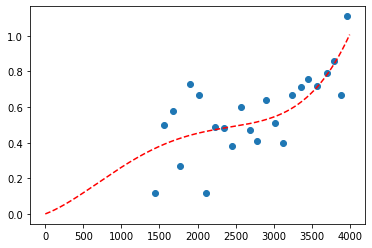

In [153]:
def objective(x, a, b, c, d, e):
	return (a * x) + (b * x**2) + (c * x**3) + (d * x**4) + e

# curve fit
popt, _ = curve_fit(objective, x, y, bounds=([0, -1, -1 , 0, 0], 1))
# summarize the parameter values
a, b, c, d, e  = popt


# plot input vs output
plt.scatter(x, y)
# define a sequence of inputs between the smallest and largest known inputs
#x_line = np.arange(min(x), max(x), 1)
x_line = np.arange(0, 4000, 1)
# calculate the output for the range
y_line = objective(x_line, a, b, c, d, e)
# create a line plot for the mapping function
plt.plot(x_line, y_line, '--', color='red')
plt.show()

#### 8.3.1.1 Interpolating values

In [154]:
for i in range(aicu_aio.shape[0]):
  if pd.isna(aicu_aio['ProdA'][i]) == True:
    aicu_aio['ProdA'][i] = objective(aicu_aio['hrdiff'][i], a, b, c, d, e)


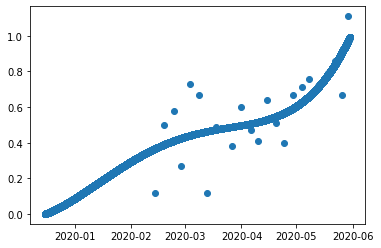

In [155]:
plt.scatter(aicu_aio['datetime'], aicu_aio['ProdA']);

### 8.3.2 avg_nr_harvested_trusses

In [156]:
# curve fit
from scipy.optimize import curve_fit
from numpy import sin, cos, tan

x, y = aicu_prod["hrdiff"], aicu_prod["avg_nr_harvested_trusses"]

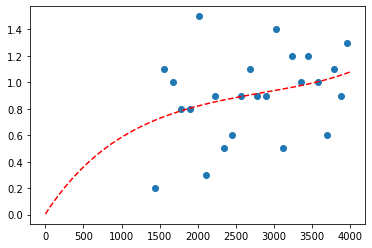

In [157]:
def objective(x, a, b, c, d, e, f):
	return (a * x) + (b * x**2) + (c * x**3) + (d * x**4) + (e * x**5) + f

# curve fit
lbound = [0, -0.05, 0, -0.05, 0, 0.005]
ubound = 2

p0 = [0.2442074,  -0.000193150, 7.420504e-08, -1.38707389e-11, 1.0115412e-15, 0.5]
popt, _ = curve_fit(objective, x, y, p0 = p0 , bounds=(lbound, ubound))
# summarize the parameter values
a, b, c, d, e, f  = popt


# plot input vs output
plt.scatter(x, y)
# define a sequence of inputs between the smallest and largest known inputs
#x_line = np.arange(min(x), max(x), 1)
x_line = np.arange(0, 4000, 1)
# calculate the output for the range
y_line = objective(x_line, a, b, c, d, e, f)
# create a line plot for the mapping function
plt.plot(x_line, y_line, '--', color='red')
plt.show()

#### 8.3.2.1 Interpolating values

In [158]:
for i in range(aicu_aio.shape[0]):
  if pd.isna(aicu_aio['avg_nr_harvested_trusses'][i]) == True:
    aicu_aio['avg_nr_harvested_trusses'][i] = objective(aicu_aio['hrdiff'][i], a, b, c, d, e, f)


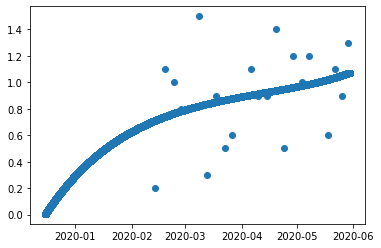

In [159]:
plt.scatter(aicu_aio['datetime'], aicu_aio['avg_nr_harvested_trusses']);

### 8.3.3 Truss development time

In [160]:
# curve fit
from scipy.optimize import curve_fit
from numpy import sin, cos, tan

x, y = aicu_prod["hrdiff"], aicu_prod["Truss development time"]

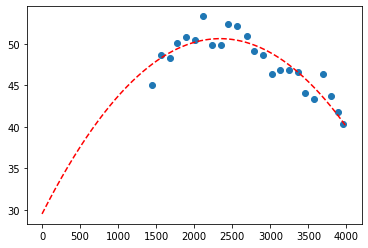

In [161]:
def objective(x, a, b, c):
	return (a * x) + (b * x**2) + c

# curve fit

popt, _ = curve_fit(objective, x, y)
# summarize the parameter values
a, b, c  = popt

# plot input vs output
plt.scatter(x, y)
# define a sequence of inputs between the smallest and largest known inputs
#x_line = np.arange(min(x), max(x), 1)
x_line = np.arange(0, 4000, 1)
# calculate the output for the range
y_line = objective(x_line, a, b, c)
# create a line plot for the mapping function
plt.plot(x_line, y_line, '--', color='red')
plt.show()

#### 8.3.2.1 Interpolating values

In [162]:
for i in range(aicu_aio.shape[0]):
  if pd.isna(aicu_aio['Truss development time'][i]) == True:
    aicu_aio['Truss development time'][i] = objective(aicu_aio['hrdiff'][i], a, b, c)


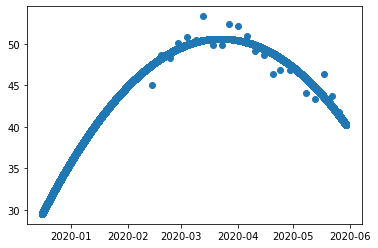

In [163]:
plt.scatter(aicu_aio['datetime'], aicu_aio['Truss development time']);

### 8.3.3 Nr_fruits_ClassA

In [164]:
# curve fit
from scipy.optimize import curve_fit
from numpy import sin, cos, tan

x, y = aicu_prod["hrdiff"], aicu_prod["Nr_fruits_ClassA"]

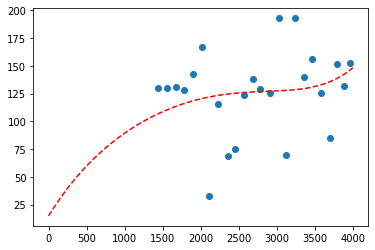

In [165]:
def objective(x, a, b, c, d, e, f):
	return (a * x) + (b * x**2) + (c * x**3) + (d * x**4) + (e * x**5) + f

# curve fit
lbound = [0, -0.00005, 0, -0.05, 0, 0.005]
ubound = 15

popt, _ = curve_fit(objective, x, y, bounds=(lbound, ubound))

# summarize the parameter values
a, b, c, d, e, f  = popt

# plot input vs output
plt.scatter(x, y)
# define a sequence of inputs between the smallest and largest known inputs
#x_line = np.arange(min(x), max(x), 1)
x_line = np.arange(0, 4000, 1)
# calculate the output for the range
y_line = objective(x_line, a, b, c, d, e, f)
# create a line plot for the mapping function
plt.plot(x_line, y_line, '--', color='red')
plt.show()

#### 8.3.2.1 Interpolating values

In [166]:
for i in range(aicu_aio.shape[0]):
  if pd.isna(aicu_aio['Nr_fruits_ClassA'][i]) == True:
    aicu_aio['Nr_fruits_ClassA'][i] = objective(aicu_aio['hrdiff'][i], a, b, c, d, e, f)


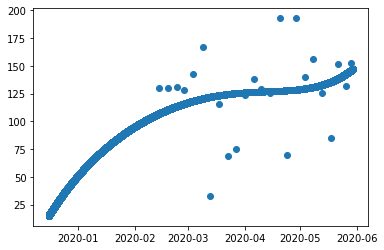

In [167]:
plt.scatter(aicu_aio['datetime'], aicu_aio['Nr_fruits_ClassA']);

### 8.3.3 Weight_fruits_ClassA

In [168]:
# curve fit
from scipy.optimize import curve_fit
from numpy import sin, cos, tan

x, y = aicu_prod["hrdiff"], aicu_prod["Weight_fruits_ClassA"]

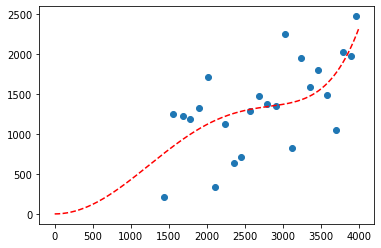

In [169]:
def objective(x, a, b, c, d, e, f):
	return (a * x) + (b * x**2) + (c * x**3) + (d * x**4) + (e * x**5) + f

# curve fit
lbound = [0, 0.0005, 0, -0.005, 0, -0.00005]
ubound = 20

popt, _ = curve_fit(objective, x, y, bounds=(lbound, ubound))

# summarize the parameter values
a, b, c, d, e, f  = popt

# plot input vs output
plt.scatter(x, y)
# define a sequence of inputs between the smallest and largest known inputs
#x_line = np.arange(min(x), max(x), 1)
x_line = np.arange(0, 4000, 1)
# calculate the output for the range
y_line = objective(x_line, a, b, c, d, e, f)
# create a line plot for the mapping function
plt.plot(x_line, y_line, '--', color='red')
plt.show()

#### 8.3.2.1 Interpolating values

In [170]:
for i in range(aicu_aio.shape[0]):
  if pd.isna(aicu_aio['Weight_fruits_ClassA'][i]) == True:
    aicu_aio['Weight_fruits_ClassA'][i] = objective(aicu_aio['hrdiff'][i], a, b, c, d, e, f)


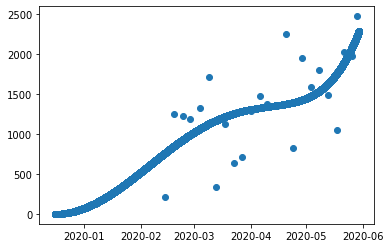

In [171]:
plt.scatter(aicu_aio['datetime'], aicu_aio['Weight_fruits_ClassA']);

## 8.4 Tomato Quality Dataset

In [172]:
#Curve fitting does not work on Datetime data. Hence, calculating the time diff between min_date and the datetime 
#at each row in hours to get around to that

aicu_tomqual['hrdiff'] = (aicu_tomqual['datetime'] - pd.Timestamp(min_date)).astype('timedelta64[h]')

In [173]:
aicu_tomqual.head()

,Flavour,TSS,Acid,%Juice,Bite,Weight,DMC_fruit,datetime,hrdiff
0,80,9.0,14.5,67,219,9.0,8.92,2020-02-19,1560.0
1,74,8.3,13.6,60,277,10.1,8.92,2020-03-04,1896.0
2,71,8.3,12.1,53,285,11.4,8.73,2020-03-18,2232.0
3,76,8.9,13.3,58,334,10.0,9.07,2020-04-01,2568.0
4,73,8.9,12.5,51,290,11.0,8.71,2020-04-15,2904.0


In [174]:
#checking if hrdiff calculated is correct for aicu_tomqual[0]
from datetime import datetime
then = datetime(2019, 12, 16, 0, 0, 0)        #min date
now  = datetime(2020, 2, 19, 0, 0, 0)  

(now - then).total_seconds()/3600

1560.0

In [175]:
aicu_tomqual.columns

Index(['Flavour', 'TSS', 'Acid', '%Juice', 'Bite', 'Weight', 'DMC_fruit',
       'datetime', 'hrdiff'],
      dtype='object')

### 8.4.1 Flavour

In [176]:
# curve fit
from scipy.optimize import curve_fit

x, y = aicu_tomqual["hrdiff"], aicu_tomqual["Flavour"]

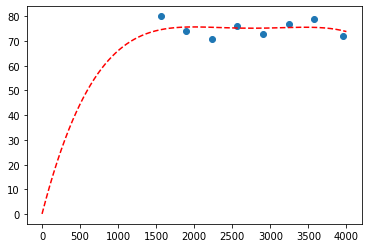

In [177]:
def objective1(x, a, b, c, d, e):
	return (a * x) + (b * x**2) + (c * x**3) + (d * x**4) + e

# curve fit
lbound = [-0.005, -1, -1, -100, 0]
ubound = [0.5, 20, 20, 20, 1]
p0 = [0.5, -0.05, -0.1085, -1.642, 0.5]
popt, _ = curve_fit(objective1, x, y, p0 = p0, bounds=(lbound, ubound))

# summarize the parameter values
a, b, c, d, e  = popt
# plot input vs output
plt.scatter(x, y)
# define a sequence of inputs between the smallest and largest known inputs
#x_line = np.arange(min(x), max(x), 1)
x_line = np.arange(0, 4000, 1)
# calculate the output for the range
y_line = objective1(x_line, a, b, c, d, e)
# create a line plot for the mapping function
plt.plot(x_line, y_line, '--', color='red')
plt.show()

#### Interpolating values

In [178]:
for i in range(aicu_aio.shape[0]):
  if pd.isna(aicu_aio['Flavour'][i]) == True:
    aicu_aio['Flavour'][i] = objective1(aicu_aio['hrdiff'][i], a, b, c, d, e)


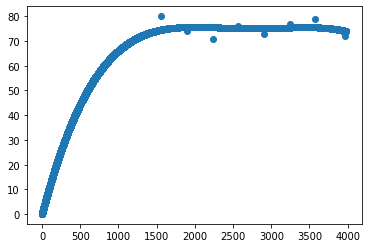

In [179]:
plt.scatter(aicu_aio['hrdiff'], aicu_aio['Flavour']);

### 8.4.2 TSS

In [180]:
# curve fit
from scipy.optimize import curve_fit

x, y = aicu_tomqual["hrdiff"], aicu_tomqual["TSS"]

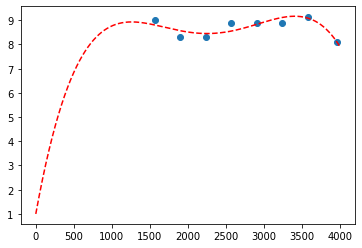

In [181]:
def objective1(x, a, b, c, d, e):
	return (a * x) + (b * x**2) + (c * x**3) + (d * x**4) + e

# curve fit
lbound = [-0.005, -1, -1, -100, 0]
ubound = [0.5, 20, 20, 20, 1]
p0 = [0.5, -0.05, -0.1085, -1.642, 0.5]
popt, _ = curve_fit(objective1, x, y, p0 = p0, bounds=(lbound, ubound))

# summarize the parameter values
a, b, c, d, e  = popt
# plot input vs output
plt.scatter(x, y)
# define a sequence of inputs between the smallest and largest known inputs
#x_line = np.arange(min(x), max(x), 1)
x_line = np.arange(0, 4000, 1)
# calculate the output for the range
y_line = objective1(x_line, a, b, c, d, e)
# create a line plot for the mapping function
plt.plot(x_line, y_line, '--', color='red')
plt.show()

#### Interpolating values

In [182]:
for i in range(aicu_aio.shape[0]):
  if pd.isna(aicu_aio['TSS'][i]) == True:
    aicu_aio['TSS'][i] = objective1(aicu_aio['hrdiff'][i], a, b, c, d, e)


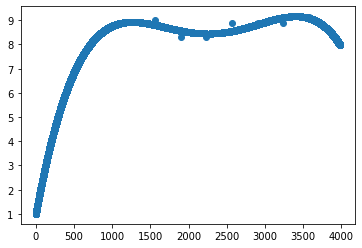

In [183]:
plt.scatter(aicu_aio['hrdiff'], aicu_aio['TSS']);

### 8.4.3 Acid

In [184]:
# curve fit
from scipy.optimize import curve_fit

x, y = aicu_tomqual["hrdiff"], aicu_tomqual["Acid"]

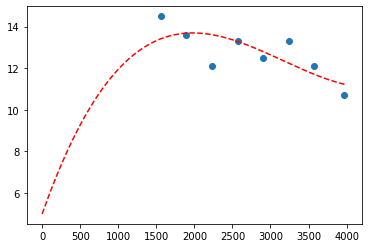

In [185]:
def objective1(x, a, b, c, d):
	return (a * x) + (b * x**2) +  (c * x**3) + d

# curve fit
lbound = [-0.05, -1, 0,  4]
ubound = 5
p0 = [0.05, -0.642, 1, 5]
popt, _ = curve_fit(objective1, x, y, p0 = p0, bounds=(lbound, ubound))

# summarize the parameter values
a, b, c, d  = popt
# plot input vs output
plt.scatter(x, y)
# define a sequence of inputs between the smallest and largest known inputs
#x_line = np.arange(min(x), max(x), 1)
x_line = np.arange(0, 4000, 1)
# calculate the output for the range
y_line = objective1(x_line, a, b, c, d)
# create a line plot for the mapping function
plt.plot(x_line, y_line, '--', color='red')
plt.show()

#### Interpolating values

In [186]:
for i in range(aicu_aio.shape[0]):
  if pd.isna(aicu_aio['Acid'][i]) == True:
    aicu_aio['Acid'][i] = objective1(aicu_aio['hrdiff'][i], a, b, c, d)


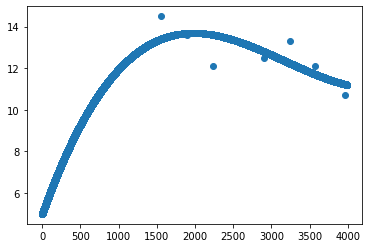

In [187]:
plt.scatter(aicu_aio['hrdiff'], aicu_aio['Acid']);

### 8.4.4 %Juice

In [188]:
# curve fit
from scipy.optimize import curve_fit

x, y = aicu_tomqual["hrdiff"], aicu_tomqual["%Juice"]

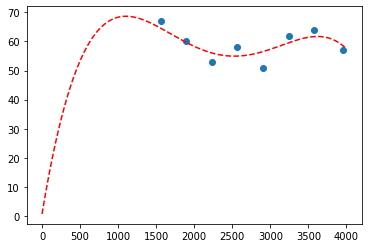

In [189]:
def objective1(x, a, b, c, d, e):
	return (a * x) + (b * x**2) + (c * x**3) + (d * x**4) + e

# curve fit
lbound = [-0.005, -1, -1, -100, 0]
ubound = [0.5, 20, 20, 20, 1]
p0 = [0.5, -0.05, -0.1085, -1.642, 0.5]
popt, _ = curve_fit(objective1, x, y, p0 = p0, bounds=(lbound, ubound))

# summarize the parameter values
a, b, c, d, e  = popt
# plot input vs output
plt.scatter(x, y)
# define a sequence of inputs between the smallest and largest known inputs
#x_line = np.arange(min(x), max(x), 1)
x_line = np.arange(0, 4000, 1)
# calculate the output for the range
y_line = objective1(x_line, a, b, c, d, e)
# create a line plot for the mapping function
plt.plot(x_line, y_line, '--', color='red')
plt.show()

#### Interpolating values

In [190]:
for i in range(aicu_aio.shape[0]):
  if pd.isna(aicu_aio['%Juice'][i]) == True:
    aicu_aio['%Juice'][i] = objective1(aicu_aio['hrdiff'][i], a, b, c, d, e)


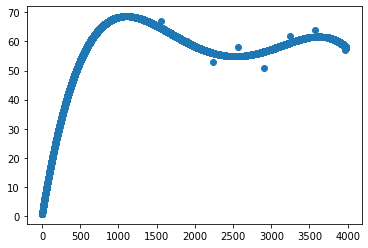

In [191]:
plt.scatter(aicu_aio['hrdiff'], aicu_aio['%Juice']);

### 8.4.5 Bite

In [192]:
# curve fit
from scipy.optimize import curve_fit

x, y = aicu_tomqual["hrdiff"], aicu_tomqual["Bite"]

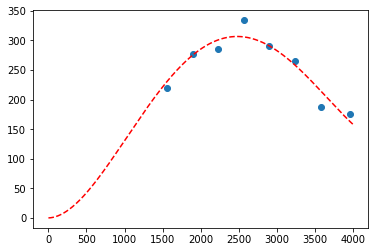

In [193]:
def objective1(x, a, b, c, d, e):
	return (a * x) + (b * x**2) + (c * x**3) + (d * x**4) + e

# curve fit
lbound = [-0.005, -1, -1, -100, 0]
ubound = [0.5, 20, 20, 20, 1]
p0 = [0.5, -0.05, -0.1085, -1.642, 0.5]
popt, _ = curve_fit(objective1, x, y, p0 = p0, bounds=(lbound, ubound))

# summarize the parameter values
a, b, c, d, e  = popt
# plot input vs output
plt.scatter(x, y)
# define a sequence of inputs between the smallest and largest known inputs
#x_line = np.arange(min(x), max(x), 1)
x_line = np.arange(0, 4000, 1)
# calculate the output for the range
y_line = objective1(x_line, a, b, c, d, e)
# create a line plot for the mapping function
plt.plot(x_line, y_line, '--', color='red')
plt.show()

#### Interpolating values

In [194]:
for i in range(aicu_aio.shape[0]):
  if pd.isna(aicu_aio['Bite'][i]) == True:
    aicu_aio['Bite'][i] = objective1(aicu_aio['hrdiff'][i], a, b, c, d, e)


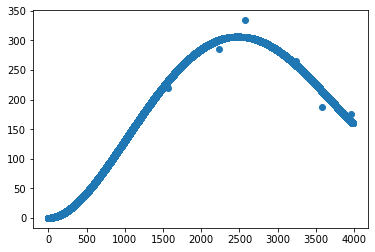

In [195]:
plt.scatter(aicu_aio['hrdiff'], aicu_aio['Bite']);

### 8.4.6 Weight

In [196]:
# curve fit
from scipy.optimize import curve_fit

x, y = aicu_tomqual["hrdiff"], aicu_tomqual["Weight"]

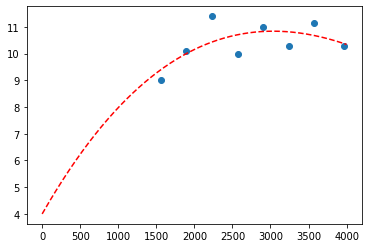

In [197]:
def objective1(x, a, b, c, d):
	return (a * x) + (b * x**2) +  (c * x**3) + d

# curve fit
lbound = [-0.05, -1, 0,  4]
ubound = 5
p0 = [0.05, -0.642, 1, 5]
popt, _ = curve_fit(objective1, x, y, p0 = p0, bounds=(lbound, ubound))

# summarize the parameter values
a, b, c, d  = popt
# plot input vs output
plt.scatter(x, y)
# define a sequence of inputs between the smallest and largest known inputs
#x_line = np.arange(min(x), max(x), 1)
x_line = np.arange(0, 4000, 1)
# calculate the output for the range
y_line = objective1(x_line, a, b, c, d)
# create a line plot for the mapping function
plt.plot(x_line, y_line, '--', color='red')
plt.show()

#### Interpolating values

In [198]:
for i in range(aicu_aio.shape[0]):
  if pd.isna(aicu_aio['Weight'][i]) == True:
    aicu_aio['Weight'][i] = objective1(aicu_aio['hrdiff'][i], a, b, c, d)


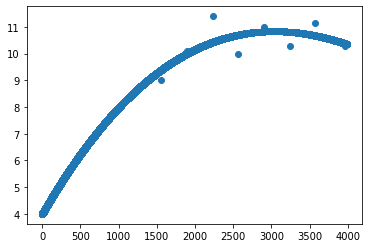

In [199]:
plt.scatter(aicu_aio['hrdiff'], aicu_aio['Weight']);

### 8.4.7 DMC_fruit

In [200]:
# curve fit
from scipy.optimize import curve_fit

x, y = aicu_tomqual["hrdiff"], aicu_tomqual["DMC_fruit"]

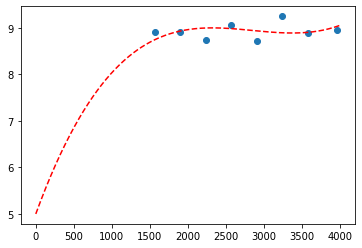

In [201]:
def objective1(x, a, b, c, d):
	return (a * x) + (b * x**2) +  (c * x**3) + d

# curve fit
lbound = [-0.05, -1, 0,  4]
ubound = 5
p0 = [0.05, -0.642, 1, 5]
popt, _ = curve_fit(objective1, x, y, p0 = p0, bounds=(lbound, ubound))

# summarize the parameter values
a, b, c, d  = popt
# plot input vs output
plt.scatter(x, y)
# define a sequence of inputs between the smallest and largest known inputs
#x_line = np.arange(min(x), max(x), 1)
x_line = np.arange(0, 4000, 1)
# calculate the output for the range
y_line = objective1(x_line, a, b, c, d)
# create a line plot for the mapping function
plt.plot(x_line, y_line, '--', color='red')
plt.show()

#### Interpolating values

In [202]:
for i in range(aicu_aio.shape[0]):
  if pd.isna(aicu_aio['DMC_fruit'][i]) == True:
    aicu_aio['DMC_fruit'][i] = objective1(aicu_aio['hrdiff'][i], a, b, c, d)


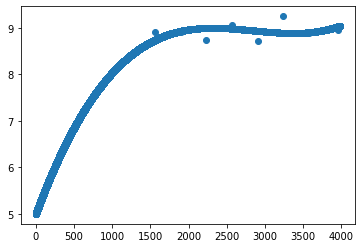

In [203]:
plt.scatter(aicu_aio['hrdiff'], aicu_aio['DMC_fruit']);

## 8.5 Crop Parameters

In [204]:
#Curve fitting does not work on Datetime data. Hence, calculating the time diff between min_date and the datetime 
#at each row in hours to get around to that

aicu_crop['hrdiff'] = (aicu_crop['datetime'] - pd.Timestamp(min_date)).astype('timedelta64[h]')

In [205]:
aicu_crop.head()

,Stem_elong,Stem_thick,Cum_trusses,stem_dens,plant_dens,datetime,hrdiff
1,29.9,11.7,1.3,3.6,1.8,2019-12-31,360.0
2,35.8,13.6,3.2,3.6,1.8,2020-01-08,552.0
3,35.1,13.5,4.7,3.6,1.8,2020-01-15,720.0
4,34.7,12.6,5.8,3.6,1.8,2020-01-22,888.0
5,32.4,11.3,6.9,3.6,1.8,2020-01-29,1056.0


In [206]:
#checking if hrdiff calculated is correct for aicu_prod[0]
from datetime import datetime
then = datetime(2019, 12, 16, 0, 0, 0)        # min date
now  = datetime(2019, 12, 31, 0, 0, 0)  

(now - then).total_seconds()/3600

360.0

In [207]:
aicu_crop.columns

Index(['Stem_elong', 'Stem_thick', 'Cum_trusses', 'stem_dens', 'plant_dens',
       'datetime', 'hrdiff'],
      dtype='object')

### 8.5.1 Stem_elong

In [208]:
# curve fit
x, y = aicu_crop["hrdiff"], aicu_crop["Stem_elong"]

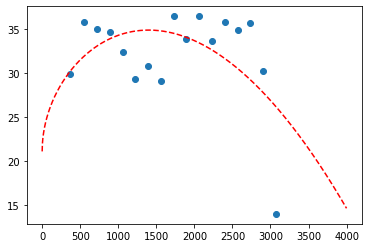

In [209]:
def objective1(x, a, b, c):
	return (a * x**0.5) + (b * x**2) + c#(c * x**3) + (d * x**0.4) + (e * x**5) + (f)# * x**6) + g

# curve fit
popt, _ = curve_fit(objective1, x, y)

# summarize the parameter values
a, b, c  = popt
# plot input vs output
plt.scatter(x, y)
# define a sequence of inputs between the smallest and largest known inputs
#x_line = np.arange(min(x), max(x), 1)
x_line = np.arange(0, 4000, 1)
# calculate the output for the range
y_line = objective1(x_line, a, b, c)
# create a line plot for the mapping function
plt.plot(x_line, y_line, '--', color='red')
plt.show()

#### Interpolating values

In [210]:
for i in range(aicu_aio.shape[0]):
  if pd.isna(aicu_aio['Stem_elong'][i]) == True:
    aicu_aio['Stem_elong'][i] = objective1(aicu_aio['hrdiff'][i], a, b, c)


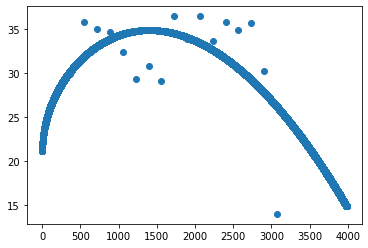

In [211]:
plt.scatter(aicu_aio['hrdiff'], aicu_aio['Stem_elong']);

### 8.5.1 Stem_thick

In [212]:
# curve fit
x, y = aicu_crop["hrdiff"], aicu_crop["Stem_thick"]

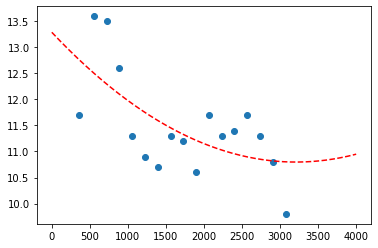

In [213]:
def objective1(x, a, b, c):
	return (a * x**1) + (b * x**2) + c#(c * x**3) + (d * x**0.4) + (e * x**5) + (f)# * x**6) + g

# curve fit
popt, _ = curve_fit(objective1, x, y)

# summarize the parameter values
a, b, c  = popt
# plot input vs output
plt.scatter(x, y)
# define a sequence of inputs between the smallest and largest known inputs
#x_line = np.arange(min(x), max(x), 1)
x_line = np.arange(0, 4000, 1)
# calculate the output for the range
y_line = objective1(x_line, a, b, c)
# create a line plot for the mapping function
plt.plot(x_line, y_line, '--', color='red')
plt.show()

#### Interpolating values

In [214]:
for i in range(aicu_aio.shape[0]):
  if pd.isna(aicu_aio['Stem_thick'][i]) == True:
    aicu_aio['Stem_thick'][i] = objective1(aicu_aio['hrdiff'][i], a, b, c)


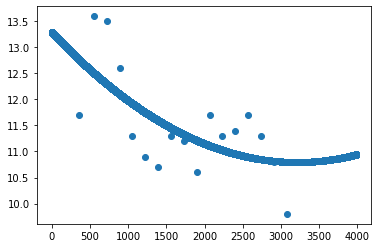

In [215]:
plt.scatter(aicu_aio['hrdiff'], aicu_aio['Stem_thick']);

### 8.5.1 Cum_trusses

In [216]:
# curve fit
x, y = aicu_crop["hrdiff"], aicu_crop["Cum_trusses"]

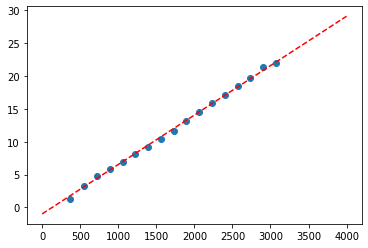

In [217]:
def objective1(x, a, b):
	return (a * x) + b #(b * x**2) + c #(c * x**3) +  (d * x**4) + (e * x**5) + f #(f * x**6) + g

# curve fit
lbound = [-0.005, -1]
ubound = [20, 2]
p0 = [0, 1]
popt, _ = curve_fit(objective1, x, y, p0 = p0, bounds=(lbound, ubound))

# summarize the parameter values
a, b  = popt
# plot input vs output
plt.scatter(x, y)
# define a sequence of inputs between the smallest and largest known inputs
#x_line = np.arange(min(x), max(x), 1)
x_line = np.arange(0, 4000, 1)
# calculate the output for the range
y_line = objective1(x_line, a, b)
# create a line plot for the mapping function
plt.plot(x_line, y_line, '--', color='red')
plt.show()

#### Interpolating values

In [218]:
for i in range(aicu_aio.shape[0]):
  if pd.isna(aicu_aio['Cum_trusses'][i]) == True:
    aicu_aio['Cum_trusses'][i] = objective1(aicu_aio['hrdiff'][i], a, b)


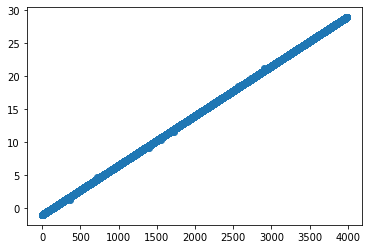

In [219]:
plt.scatter(aicu_aio['hrdiff'], aicu_aio['Cum_trusses']);

## 8.6 Resources

In [220]:
aicu_res['hrdiff'] = (aicu_res['datetime'] - pd.Timestamp(min_date)).astype('timedelta64[h]')

In [221]:
aicu_res.head()

,Heat_cons,ElecHigh,ElecLow,CO2_cons,Irr,Drain,datetime,hrdiff
0,2.8557,0.844750,0.000000,0.005477,16.2,0.0,2019-12-16,0.0
1,1.1328,0.522667,0.000000,0.005503,0.0,0.0,2019-12-17,24.0
2,1.1430,0.837000,0.000000,0.011452,0.0,0.0,2019-12-18,48.0
3,0.1194,0.864000,0.540000,0.019830,0.0,0.0,2019-12-19,72.0
4,0.5727,1.326583,0.550833,0.031044,0.8,0.0,2019-12-20,96.0


In [222]:
#checking if hrdiff calculated is correct for aicu_prod[0]
from datetime import datetime
then = datetime(2019, 12, 16, 0, 0, 0)        # min date
now  = datetime(2019, 12, 17, 0, 0, 0)  

(now - then).total_seconds()/3600

24.0

In [223]:
aicu_res.columns

Index(['Heat_cons', 'ElecHigh', 'ElecLow', 'CO2_cons', 'Irr', 'Drain',
       'datetime', 'hrdiff'],
      dtype='object')

### 8.6.1 Heat_cons

In [224]:
# curve fit
from scipy.optimize import curve_fit

x, y = aicu_res["hrdiff"], aicu_res["Heat_cons"]

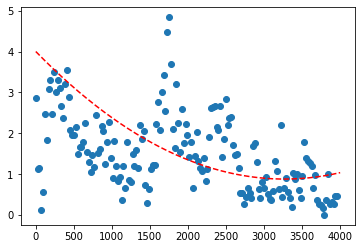

In [225]:
def objective1(x, a, b, c, d):
	return (a * x) + (b * x**2) +  (c * x**3) + d

# curve fit
lbound = [-0.05, -1, 0,  4]
ubound = 5
p0 = [0.05, -0.642, 1, 5]
popt, _ = curve_fit(objective1, x, y, p0 = p0, bounds=(lbound, ubound))

# summarize the parameter values
a, b, c, d  = popt
# plot input vs output
plt.scatter(x, y)
# define a sequence of inputs between the smallest and largest known inputs
#x_line = np.arange(min(x), max(x), 1)
x_line = np.arange(0, 4000, 1)
# calculate the output for the range
y_line = objective1(x_line, a, b, c, d)
# create a line plot for the mapping function
plt.plot(x_line, y_line, '--', color='red')
plt.show()

In [226]:
for i in range(aicu_aio.shape[0]):
  if pd.isna(aicu_aio['Heat_cons'][i]) == True:
    aicu_aio['Heat_cons'][i] = objective1(aicu_aio['hrdiff'][i], a, b, c, d)

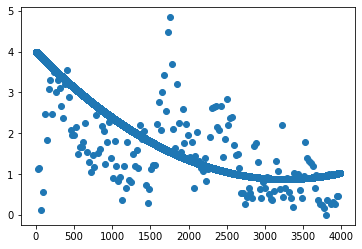

In [227]:
plt.scatter(aicu_aio['hrdiff'], aicu_aio['Heat_cons']);

### 8.6.2 ElecHigh

In [228]:
# curve fit
from scipy.optimize import curve_fit

x, y = aicu_res["hrdiff"], aicu_res["ElecHigh"]

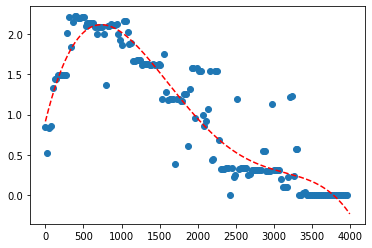

In [229]:
def objective1(x, a, b, c, d, e):
	return (a * x) + (b * x**2) +  (c * x**3) + (d * x**4) + e

# curve fit
lbound = [-0.05, -1, 0,  4]
ubound = 5
p0 = [0.05, -0.642, 1, 5]
popt, _ = curve_fit(objective1, x, y)#, p0 = p0, bounds=(lbound, ubound))

# summarize the parameter values
a, b, c, d, e  = popt
# plot input vs output
plt.scatter(x, y)
# define a sequence of inputs between the smallest and largest known inputs
#x_line = np.arange(min(x), max(x), 1)
x_line = np.arange(0, 4000, 1)
# calculate the output for the range
y_line = objective1(x_line, a, b, c, d, e)
# create a line plot for the mapping function
plt.plot(x_line, y_line, '--', color='red')
plt.show()

In [231]:
for i in range(aicu_aio.shape[0]):
  if pd.isna(aicu_aio['ElecHigh'][i]) == True:
    aicu_aio['ElecHigh'][i] = objective1(aicu_aio['hrdiff'][i], a, b, c, d, e)

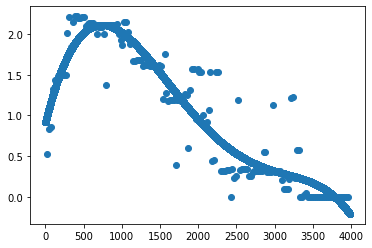

In [232]:
plt.scatter(aicu_aio['hrdiff'], aicu_aio['ElecHigh']);

### 8.6.3 ElecLow

In [233]:
# curve fit
from scipy.optimize import curve_fit

x, y = aicu_res["hrdiff"], aicu_res["ElecLow"]

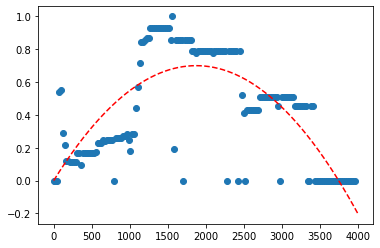

In [234]:
def objective1(x, a, b, c):
	return (a * x) + (b * x**2) + c

# curve fit
lbound = [0, -0.5, 0]
ubound = 2

p0 = [0.2442074,  -0.000193150, 0]
popt, _ = curve_fit(objective1, x, y, p0 = p0 , bounds=(lbound, ubound))
# summarize the parameter values
a, b, c  = popt


# plot input vs output
plt.scatter(x, y)
# define a sequence of inputs between the smallest and largest known inputs
#x_line = np.arange(min(x), max(x), 1)
x_line = np.arange(0, 4000, 1)
# calculate the output for the range
y_line = objective1(x_line, a, b, c)
# create a line plot for the mapping function
plt.plot(x_line, y_line, '--', color='red')
plt.show()

In [235]:
for i in range(aicu_aio.shape[0]):
  if pd.isna(aicu_aio['ElecLow'][i]) == True:
    aicu_aio['ElecLow'][i] = objective1(aicu_aio['hrdiff'][i], a, b, c)

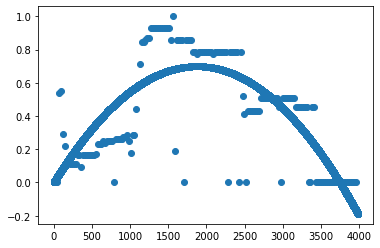

In [236]:
plt.scatter(aicu_aio['hrdiff'], aicu_aio['ElecLow']);


### 8.6.4 CO2_cons

In [237]:
# curve fit
from scipy.optimize import curve_fit

x, y = aicu_res["hrdiff"], aicu_res["CO2_cons"]

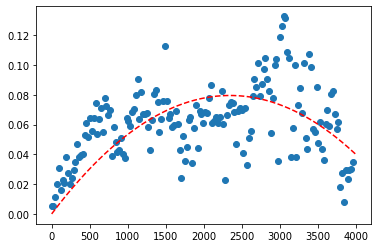

In [238]:
def objective1(x, a, b):
	return (a * x) + (b * x**2) 

# curve fit
lbound = [-0.005, -1]
ubound = [0.5, 20]
p0 = [0.5, -0.05]
popt, _ = curve_fit(objective1, x, y, p0 = p0, bounds=(lbound, ubound))

# summarize the parameter values
a, b= popt
# plot input vs output
plt.scatter(x, y)
# define a sequence of inputs between the smallest and largest known inputs
#x_line = np.arange(min(x), max(x), 1)
x_line = np.arange(0, 4000, 1)
# calculate the output for the range
y_line = objective1(x_line, a, b)
# create a line plot for the mapping function
plt.plot(x_line, y_line, '--', color='red')
plt.show()

In [239]:
for i in range(aicu_aio.shape[0]):
  if pd.isna(aicu_aio['CO2_cons'][i]) == True:
    aicu_aio['CO2_cons'][i] = objective1(aicu_aio['hrdiff'][i], a, b)

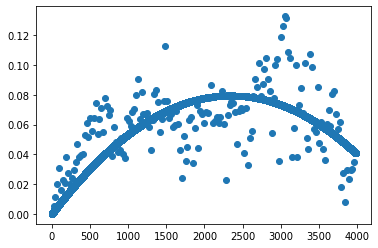

In [240]:
plt.scatter(aicu_aio['hrdiff'], aicu_aio['CO2_cons']);


### 8.6.5 Irr

In [241]:
# curve fit
from scipy.optimize import curve_fit

x, y = aicu_res["hrdiff"], aicu_res["Irr"]

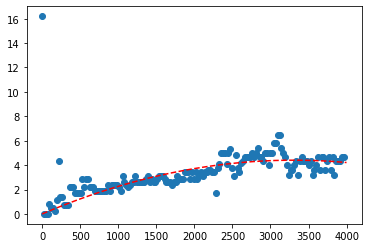

In [242]:
def objective1(x, a, b):
	return (a * x) + (b * x**2) 

# curve fit
lbound = [-0.005, -1]
ubound = [0.5, 20]
p0 = [0.5, -0.05]
popt, _ = curve_fit(objective1, x, y, p0 = p0, bounds=(lbound, ubound))

# summarize the parameter values
a, b= popt
# plot input vs output
plt.scatter(x, y)
# define a sequence of inputs between the smallest and largest known inputs
#x_line = np.arange(min(x), max(x), 1)
x_line = np.arange(0, 4000, 1)
# calculate the output for the range
y_line = objective1(x_line, a, b)
# create a line plot for the mapping function
plt.plot(x_line, y_line, '--', color='red')
plt.show()

In [243]:
for i in range(aicu_aio.shape[0]):
  if pd.isna(aicu_aio['Irr'][i]) == True:
    aicu_aio['Irr'][i] = objective1(aicu_aio['hrdiff'][i], a, b)

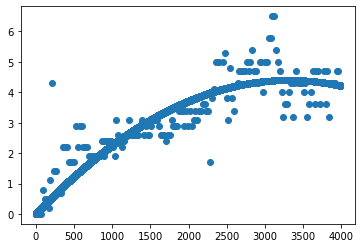

In [244]:
plt.scatter(aicu_aio['hrdiff'], aicu_aio['Irr']);


### 8.6.6 Drain

In [245]:
# curve fit
from scipy.optimize import curve_fit

x, y = aicu_res["hrdiff"], aicu_res["Drain"]

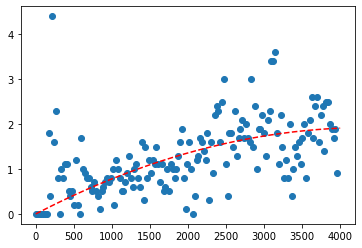

In [246]:
def objective1(x, a, b):
	return (a * x) + (b * x**2) 

# curve fit
lbound = [-0.005, -1]
ubound = [0.5, 20]
p0 = [0.5, -0.05]
popt, _ = curve_fit(objective1, x, y, p0 = p0, bounds=(lbound, ubound))

# summarize the parameter values
a, b= popt
# plot input vs output
plt.scatter(x, y)
# define a sequence of inputs between the smallest and largest known inputs
#x_line = np.arange(min(x), max(x), 1)
x_line = np.arange(0, 4000, 1)
# calculate the output for the range
y_line = objective1(x_line, a, b)
# create a line plot for the mapping function
plt.plot(x_line, y_line, '--', color='red')
plt.show()

In [247]:
for i in range(aicu_aio.shape[0]):
  if pd.isna(aicu_aio['Drain'][i]) == True:
    aicu_aio['Drain'][i] = objective1(aicu_aio['hrdiff'][i], a, b)

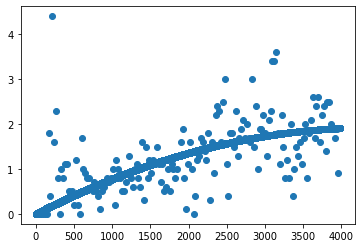

In [248]:
plt.scatter(aicu_aio['hrdiff'], aicu_aio['Drain']);


## 8.7 Lab Results

In [249]:
aicu_lab['hrdiff'] = (aicu_lab['datetime'] - pd.Timestamp(min_date)).astype('timedelta64[h]')

In [250]:
aicu_lab.head()

,irr_PH,irr_EC,irr_NH4,irr_K,irr_Na,irr_Ca,irr_Mg,irr_Si,irr_NO3,irr_Cl,...,drain_HCO3,drain_PO4,drain_Fe,drain_Mn,drain_Zn,drain_B,drain_Cu,drain_Mo,datetime,hrdiff
0,5.3,4.3,1.1,15.2,0.3,9.6,4.9,0.09,21.7,5.7,...,1.4,2.00,27.8,7.7,5.7,49.0,0.9,0.61,2020-01-06,504.0
1,5.2,4.0,1.1,11.3,0.3,9.8,4.1,0.09,21.0,5.3,...,1.3,0.42,21.1,0.8,6.4,56.0,0.7,0.94,2020-01-20,840.0
2,4.8,3.9,1.3,11.6,0.3,10.2,3.5,0.09,18.6,8.2,...,1.0,1.30,18.3,1.1,3.7,93.0,0.5,0.47,2020-02-03,1176.0
3,4.8,3.7,1.4,13.3,0.4,8.2,2.8,0.09,16.0,7.2,...,0.1,6.10,24.4,4.5,3.8,134.0,1.0,0.13,2020-02-18,1536.0
4,4.7,3.5,1.1,11.3,0.4,7.6,2.5,0.01,14.1,6.6,...,0.1,9.32,31.0,11.0,6.5,113.0,1.1,0.10,2020-03-03,1872.0


In [251]:
#checking if hrdiff calculated is correct for aicu_prod[0]
from datetime import datetime
then = datetime(2019, 12, 16, 0, 0, 0)        # min date
now  = datetime(2020, 1, 6, 0, 0, 0)  

(now - then).total_seconds()/3600

504.0

In [252]:
aicu_lab.columns

Index(['irr_PH', 'irr_EC', 'irr_NH4', 'irr_K', 'irr_Na', 'irr_Ca', 'irr_Mg',
       'irr_Si', 'irr_NO3', 'irr_Cl', 'irr_SO4', 'irr_HCO3', 'irr_PO4',
       'irr_Fe', 'irr_Mn', 'irr_Zn', 'irr_B', 'irr_Cu', 'irr_Mo', 'drain_PH',
       'drain_EC', 'drain_NH4', 'drain_K', 'drain_Na', 'drain_Ca', 'drain_Mg',
       'drain_Si', 'drain_NO3', 'drain_Cl', 'drain_SO4', 'drain_HCO3',
       'drain_PO4', 'drain_Fe', 'drain_Mn', 'drain_Zn', 'drain_B', 'drain_Cu',
       'drain_Mo', 'datetime', 'hrdiff'],
      dtype='object')

### 8.7.1 Curve fitting with 4th Order of polynomial

In [253]:
def objective1(x, a, b, c, d, e):
	return (a * x) + (b * x**2) + (c * x**3) + (d * x**4) + e

col_list_deg4 = ['irr_PH', 'irr_EC', 'irr_NH4',  'irr_Na', 'irr_Ca', 'irr_Mg',
       'irr_Si', 'irr_NO3', 'irr_Cl', 'irr_SO4', 'irr_HCO3', 
       'irr_Fe',   'irr_B', 'irr_Cu', 'drain_PH', 'drain_Mg', 
       'drain_NO3', 'drain_Cl', 'drain_SO4', 'drain_HCO3', 'drain_Mo']

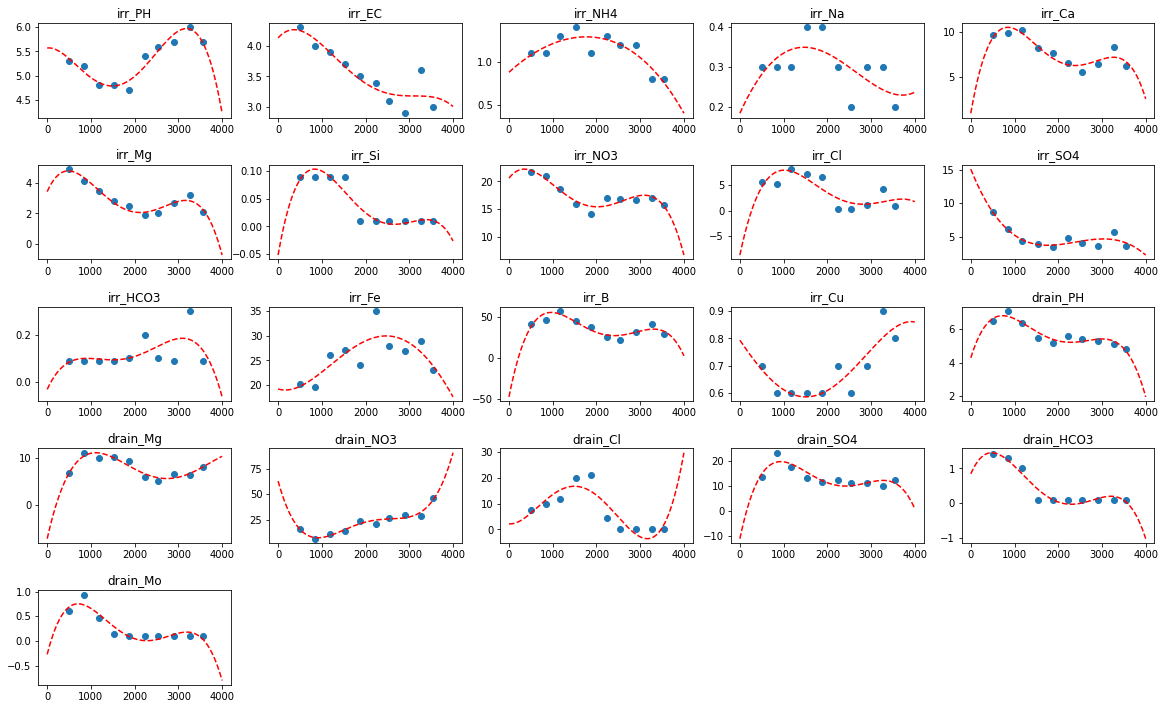

In [254]:
plt.figure(figsize=(20, 20))
plt.subplots_adjust(hspace=0.5)

for n, col in enumerate(col_list_deg4):

  # add a new subplot iteratively
  ax = plt.subplot(8, 5, n + 1)

  x, y = aicu_lab["hrdiff"], aicu_lab[col]
  popt, _ = curve_fit(objective1, x, y)
  # summarize the parameter values
  a, b, c, d, e  = popt

  # plot input vs output
  ax.scatter(x, y)
  
  # define a sequence of inputs between the smallest and largest known inputs
  x_line = np.arange(0, 4000, 1)
  # calculate the output for the range
  y_line = objective1(x_line, a, b, c, d, e)
  # create a line plot for the mapping function
  ax.plot(x_line, y_line, '--', color='red')

  # chart formatting
  ax.set_title(col)  
plt.show()


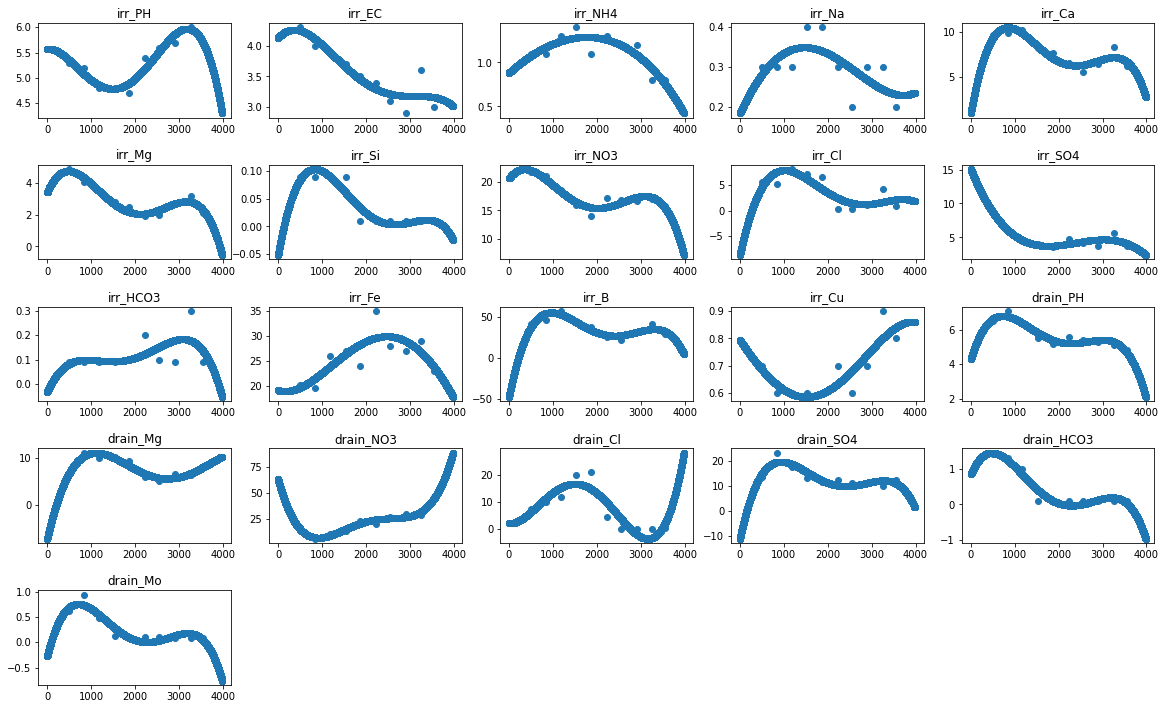

In [255]:
plt.figure(figsize=(20, 20))
plt.subplots_adjust(hspace=0.5)

for n, col in enumerate(col_list_deg4):

  # add a new subplot iteratively
  ax = plt.subplot(8, 5, n + 1)

  x, y = aicu_lab["hrdiff"], aicu_lab[col]
  popt, _ = curve_fit(objective1, x, y)
  # summarize the parameter values
  a, b, c, d, e  = popt

  for i in range(aicu_aio.shape[0]):
    if pd.isna(aicu_aio[col][i]) == True:
      aicu_aio[col][i] = objective1(aicu_aio['hrdiff'][i], a, b, c, d, e)

  ax.scatter(aicu_aio['hrdiff'], aicu_aio[col]);
  ax.set_title(col)

plt.show()


### 8.7.2 Curve fitting with 3rd Order of polynomial

In [256]:
def objective2(x, a, b, c, d):
	return (a * x) + (b * x**2) + (c * x**3) + d

col_list_deg3 = ['irr_K', 'irr_Mo', 'irr_Zn', 'irr_PO4', 'irr_Mn', 'drain_EC', 'drain_K', 'drain_Na', 'drain_Ca', 'drain_Si', 
                'drain_B', 'drain_Cu', 'drain_PO4', 'drain_Fe', 'drain_Mn', 'drain_Zn']

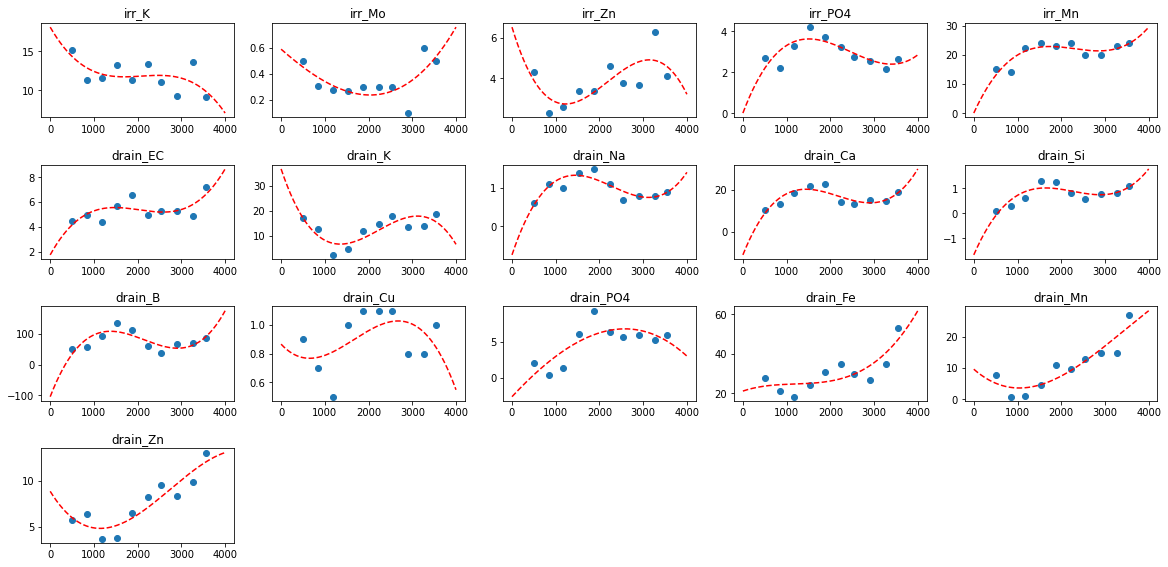

In [257]:
plt.figure(figsize=(20, 20))
plt.subplots_adjust(hspace=0.5)

for n, col in enumerate(col_list_deg3):

  # add a new subplot iteratively
  ax = plt.subplot(8, 5, n + 1)

  x, y = aicu_lab["hrdiff"], aicu_lab[col]
  popt, _ = curve_fit(objective2, x, y)
  # summarize the parameter values
  a, b, c, d  = popt

  # plot input vs output
  ax.scatter(x, y)
  
  # define a sequence of inputs between the smallest and largest known inputs
  x_line = np.arange(0, 4000, 1)
  # calculate the output for the range
  y_line = objective2(x_line, a, b, c, d)
  # create a line plot for the mapping function
  ax.plot(x_line, y_line, '--', color='red')

  # chart formatting
  ax.set_title(col)  
plt.show()


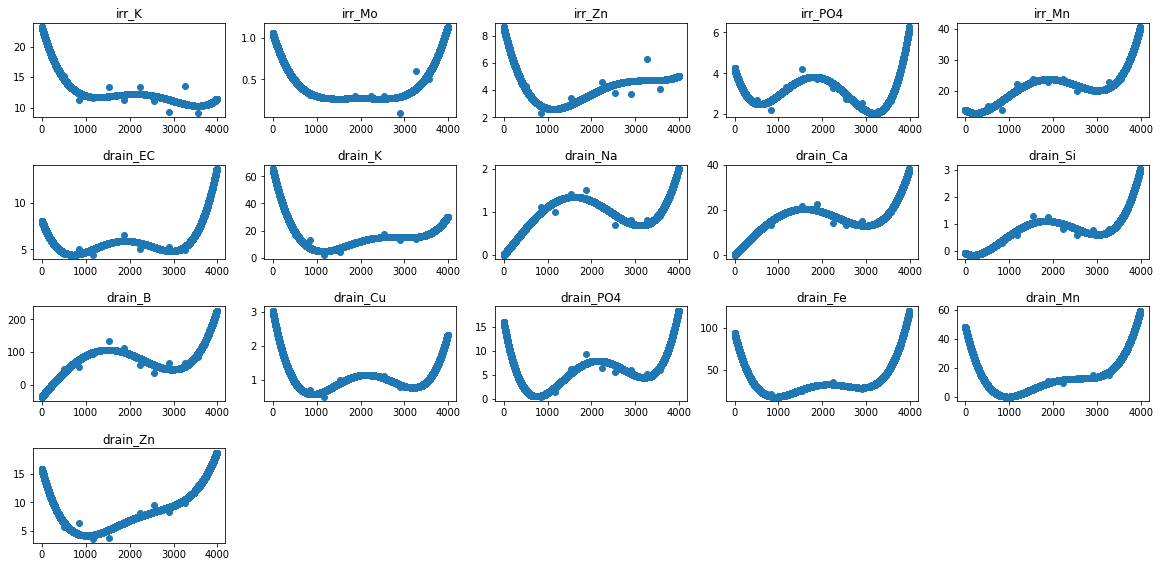

In [258]:
plt.figure(figsize=(20, 20))
plt.subplots_adjust(hspace=0.5)

for n, col in enumerate(col_list_deg3):

  # add a new subplot iteratively
  ax = plt.subplot(8, 5, n + 1)

  x, y = aicu_lab["hrdiff"], aicu_lab[col]
  popt, _ = curve_fit(objective1, x, y)
  # summarize the parameter values
  a, b, c, d, e  = popt

  for i in range(aicu_aio.shape[0]):
    if pd.isna(aicu_aio[col][i]) == True:
      aicu_aio[col][i] = objective1(aicu_aio['hrdiff'][i], a, b, c, d, e)

  ax.scatter(aicu_aio['hrdiff'], aicu_aio[col]);
  ax.set_title(col)

plt.show()


### 8.7.3 drain_NH4 has contant value, no curve fitting required

In [259]:
aicu_lab['drain_NH4'].value_counts()

0.09    9
0.10    1
Name: drain_NH4, dtype: int64

In [260]:
aicu_aio['drain_NH4'] = aicu_lab['drain_NH4'].min()

## 8.5 Final Climate dataset merging with Grodan Sensor

In [261]:
aicu_aio = pd.merge(aicu_aio, aicu_grodan_sens, on = 'datetime', how = 'left')
aicu_aio = aicu_aio.dropna()

In [262]:
aicu_aio.isna().sum().sum()

0

In [263]:
#pickling the combined dataset otherwise we will waste time in doing above curve fitting everytime for new run

import pickle

pickle.dump(aicu_aio, open('/content/drive/MyDrive/Data Science Projects/Algeria Greenhouse Project/AICU/aicu_aio.pkl', 'wb'))

# 9.0 Feature Selection

In [264]:
with open('/content/drive/MyDrive/Data Science Projects/Algeria Greenhouse Project/AICU/aicu_aio.pkl', 'rb') as file:      
    # Call load method to deserialze
    aicu_aio = pickle.load(file)

aicu_aio.head()

,AssimLight,BlackScr,CO2air,Cum_irr,EC_drain_PC,EnScr,HumDef,PipeGrow,PipeLow,Rhair,...,%Juice,Bite,Weight,DMC_fruit,EC_slab1,EC_slab2,WC_slab1,WC_slab2,t_slab1,t_slab2
155,100.0,0.0,560.0,1.7,6.0,96.0,2.5,0.0,0.0,87.1,...,2.797221,0.124720,4.064627,5.057907,4.7,4.9,93.0,92.1,22.1,22.3
392,100.0,0.0,578.0,0.0,6.0,95.0,4.5,0.0,0.0,72.9,...,5.710302,0.369989,4.158440,5.141555,4.9,5.1,92.6,91.1,15.4,15.7
393,100.0,0.0,572.0,0.0,6.0,95.0,4.4,0.0,0.0,73.0,...,5.710302,0.369989,4.158440,5.141555,4.9,5.1,92.8,91.1,15.5,15.8
394,100.0,0.0,587.0,0.0,6.0,95.0,4.4,0.0,0.0,73.3,...,5.710302,0.369989,4.158440,5.141555,4.9,5.1,92.7,91.3,15.6,15.8
395,100.0,0.0,565.0,0.0,6.0,95.0,4.4,0.0,0.0,73.5,...,5.861172,0.386802,4.163357,5.145926,4.9,5.1,92.7,91.5,15.7,15.9


In [265]:
aicu_aio.columns

Index(['AssimLight', 'BlackScr', 'CO2air', 'Cum_irr', 'EC_drain_PC', 'EnScr',
       'HumDef', 'PipeGrow', 'PipeLow', 'Rhair',
       ...
       '%Juice', 'Bite', 'Weight', 'DMC_fruit', 'EC_slab1', 'EC_slab2',
       'WC_slab1', 'WC_slab2', 't_slab1', 't_slab2'],
      dtype='object', length=116)

## 9.1 Correlation

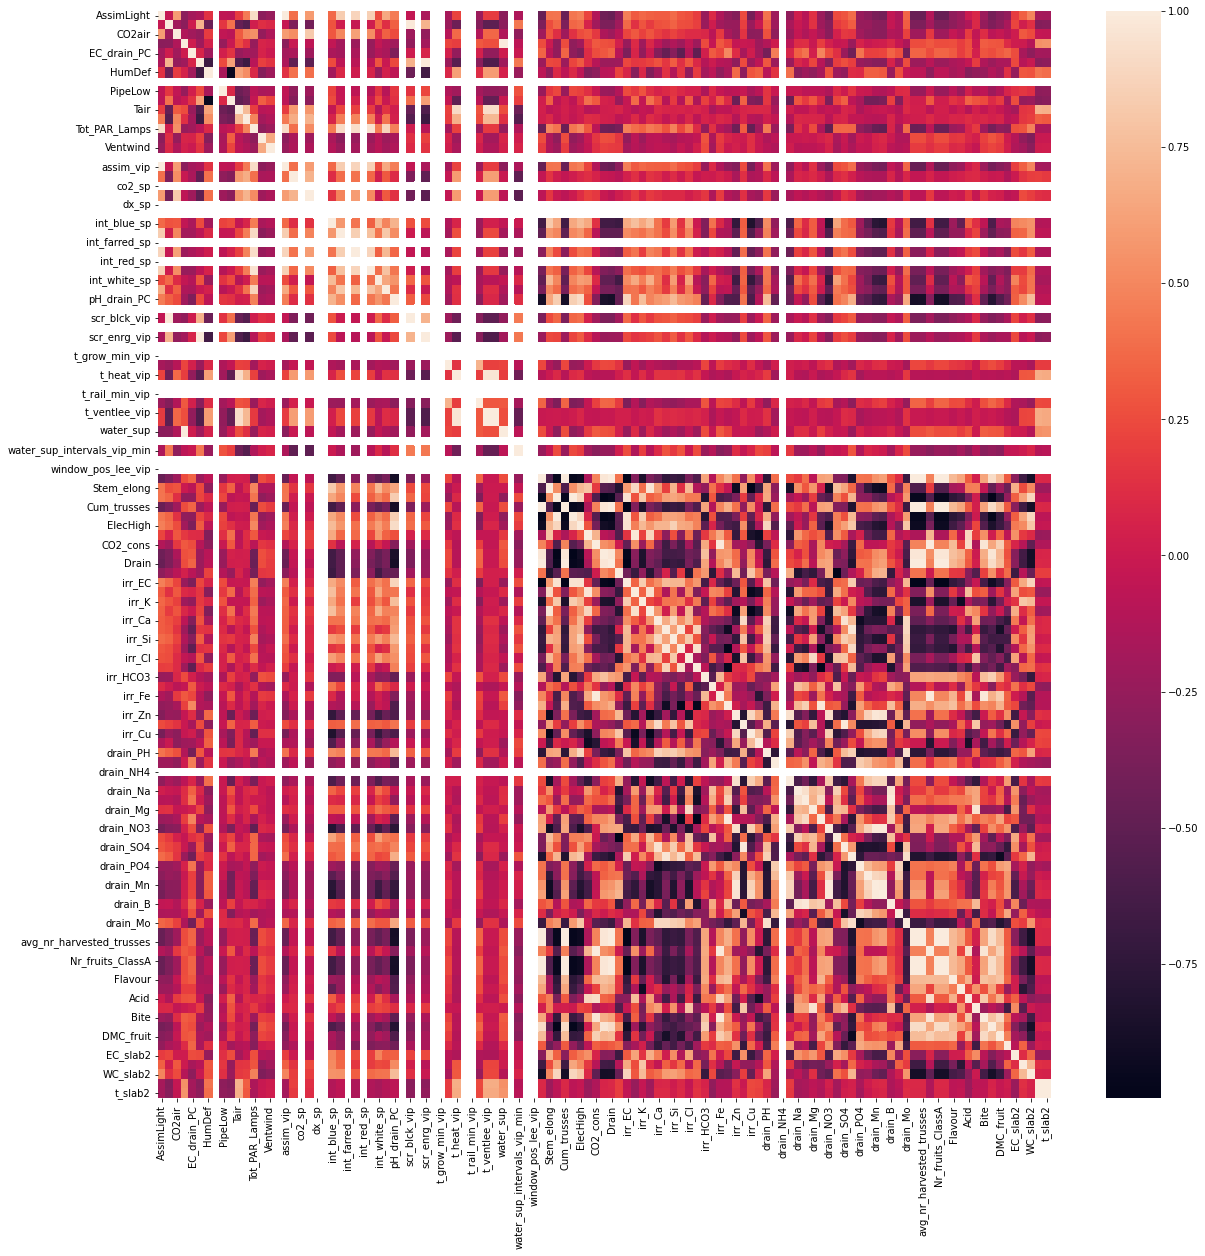

In [266]:
correlation_mat = aicu_aio.corr(method = 'spearman')
plt.figure(figsize = (20,20))
sns.heatmap(correlation_mat, annot = False);

In [267]:
#droppping columns having no correlations
a_list = [i for i in correlation_mat.columns if correlation_mat[i].isnull().sum() > 0.90*correlation_mat.shape[0]]
aicu_aio = aicu_aio.drop(columns =a_list, axis = 1)
aicu_aio.shape

(45452, 99)

### 9.1.1 Correlation Between Production variables

In [268]:
prod_col = ['ProdA', 'avg_nr_harvested_trusses', 'Truss development time', 'Nr_fruits_ClassA', 'Weight_fruits_ClassA']

In [269]:
prod_data = aicu_aio[prod_col]

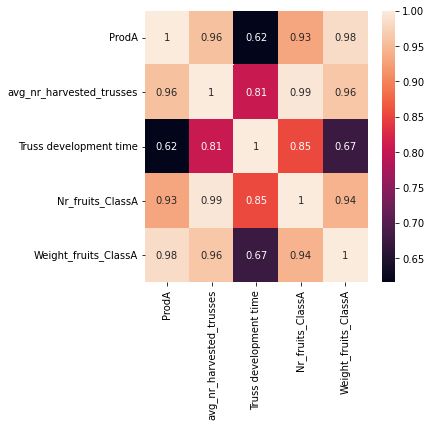

In [270]:
plt.figure(figsize = (5,5))
sns.heatmap(prod_data.corr(), annot = True);

In [271]:
prod_col_final = ['ProdA', 'Truss development time']

### 9.1.2 Correlation between Quality variables

In [272]:
qual_col = ['Flavour', 'TSS', 'Acid', '%Juice', 'Bite', 'Weight', 'DMC_fruit']

In [273]:
qual_data = aicu_aio[qual_col]

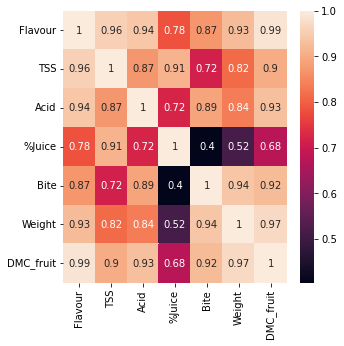

In [274]:
plt.figure(figsize = (5,5))
sns.heatmap(qual_data.corr(), annot = True);

In [275]:
qual_col_final = ['Flavour', '%Juice']

### 9.1.3 Creation of Dependent & Independent feature list

In [276]:
y_col = prod_col_final + qual_col_final  #final dependent feature list to be used for modeling

#finding columns which are from production & quality data but not included in y_col
# these columns will be dropped from dataset

all_y_col = prod_col + qual_col
common = list(dict.fromkeys([l1 for l1 in y_col if l1 in all_y_col]))
not_y_col = list(filter(lambda i: i not in common, y_col + all_y_col))


In [277]:
all_data_col = list(aicu_aio.columns)
X_prelim_col = list(set(all_data_col).difference(all_y_col))
#X_prelim_col.remove('hrdiff')

In [278]:
len(X_prelim_col)

87

### 9.1.4 Finding highly correlated columns in X and dropping those

In [279]:
X_prel = aicu_aio[X_prelim_col]

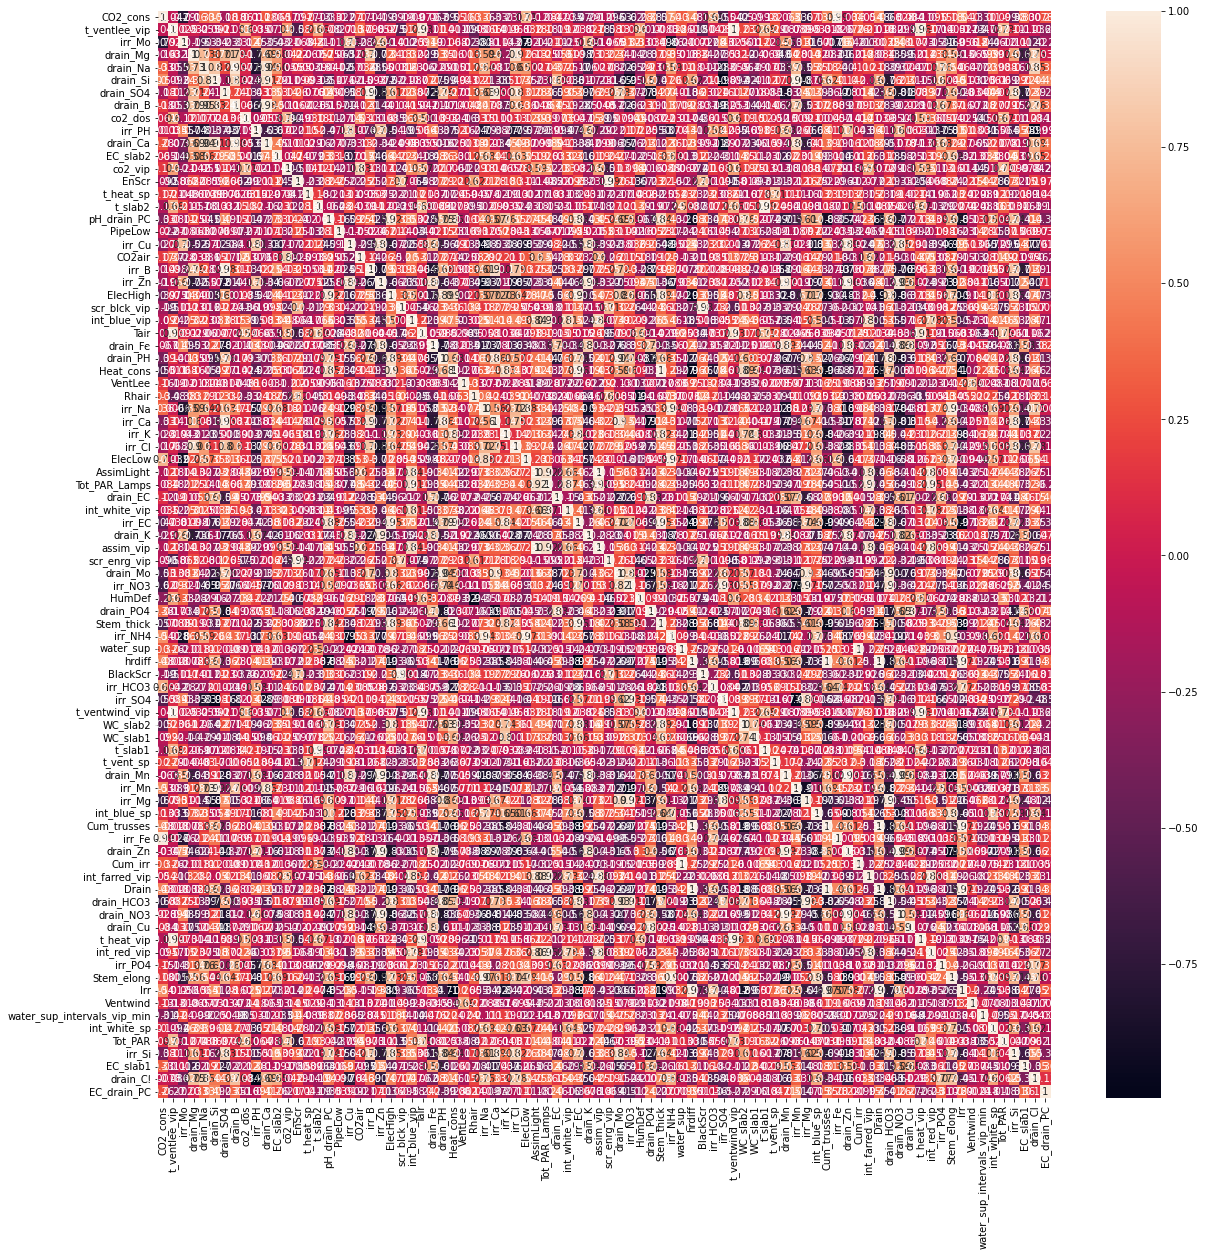

In [280]:
plt.figure(figsize = (20,20))
sns.heatmap(X_prel.corr(method = 'spearman'), annot = True);

In [281]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [282]:
threshold=0.85
correlation_res = list(correlation(X_prel,threshold))
correlation_res

['irr_EC',
 'drain_K',
 'assim_vip',
 'drain_B',
 'scr_enrg_vip',
 'drain_Mo',
 'irr_NO3',
 'drain_Ca',
 'HumDef',
 'drain_PO4',
 'Stem_thick',
 'irr_NH4',
 'hrdiff',
 'BlackScr',
 'irr_SO4',
 'WC_slab1',
 't_ventwind_vip',
 'WC_slab2',
 't_slab1',
 'drain_Mn',
 'irr_Mn',
 'irr_Mg',
 'int_blue_sp',
 'irr_B',
 'irr_Zn',
 'ElecHigh',
 'Cum_trusses',
 'Tair',
 'drain_Fe',
 'irr_Fe',
 'drain_PH',
 'drain_Zn',
 'Cum_irr',
 'int_farred_vip',
 'Drain',
 'drain_HCO3',
 'drain_NO3',
 'drain_Cu',
 'irr_Na',
 't_heat_vip',
 'int_red_vip',
 'irr_Ca',
 'Stem_elong',
 'Irr',
 'irr_Cl',
 'irr_Si',
 'ElecLow',
 'drain_Cl',
 'Tot_PAR_Lamps',
 'drain_EC']

In [283]:
X_final_col = list(set(X_prelim_col).difference(correlation_res))

## 9.2 Feature Importance using Extra Tree Regressor

### 9.2.1 ET for all fetures from X_prelim

In [284]:
from sklearn.ensemble import ExtraTreesRegressor

In [285]:
X = aicu_aio[X_prelim_col].set_index('datetime')
y = aicu_aio[y_col]

In [286]:
model=ExtraTreesRegressor();
model.fit(X,y)

ExtraTreesRegressor()

In [287]:
dfscores =pd.DataFrame(model.feature_importances_,columns=["Score"]) 
dfcolumns=pd.DataFrame(X.columns)

ET_rank=pd.concat([dfcolumns, dfscores],axis=1)
ET_rank.columns=['Features','Score']
ET_rank = ET_rank.sort_values(by = 'Score', ascending = False).reset_index(drop = True)
ET_rank['Score_cum'] = ET_rank['Score'].cumsum()

In [288]:
ET_rank[ET_rank['Score_cum']<0.95]

,Features,Score,Score_cum
0,irr_SO4,0.110725,0.110725
1,irr_K,0.084105,0.194831
2,Cum_trusses,0.066644,0.261474
3,Stem_thick,0.063992,0.325467
4,drain_Si,0.060801,0.386268
5,drain_B,0.048043,0.434311
6,irr_Mn,0.047925,0.482236
7,drain_Ca,0.047677,0.529913
8,Irr,0.046916,0.576830
9,CO2_cons,0.043394,0.620224


In [289]:
X_final_col_list1 = list(ET_rank.sort_values(by = 'Score', ascending = False)['Features'][:20])

### 9.2.2 ET for X_final after Correlation

In [290]:
X = aicu_aio[X_final_col].set_index('datetime')
y = aicu_aio[y_col]

In [291]:
model=ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [292]:
dfscores =pd.DataFrame(model.feature_importances_,columns=["Score"]) 
dfcolumns=pd.DataFrame(X.columns)

ET_rank2=pd.concat([dfcolumns, dfscores],axis=1)
ET_rank2.columns=['Features','Score']
ET_rank2 = ET_rank2.sort_values(by = 'Score', ascending = False).reset_index(drop = True)
ET_rank2['Score_cum'] = ET_rank2['Score'].cumsum()

In [293]:
ET_rank2[ET_rank2['Score_cum']<0.98]

,Features,Score,Score_cum
0,irr_K,0.190360,0.190360
1,drain_Na,0.142441,0.332802
2,drain_Si,0.140993,0.473795
3,Heat_cons,0.133437,0.607231
4,CO2_cons,0.122179,0.729410
5,drain_Mg,0.117259,0.846669
6,drain_SO4,0.029416,0.876086
7,water_sup_intervals_vip_min,0.024531,0.900616
8,irr_Cu,0.022269,0.922886
9,irr_Mo,0.019800,0.942685


In [294]:
X_final_col_list2 = list(ET_rank2.sort_values(by = 'Score', ascending = False)['Features'][:10])

In [295]:
X_final_col_list2

['irr_K',
 'drain_Na',
 'drain_Si',
 'Heat_cons',
 'CO2_cons',
 'drain_Mg',
 'drain_SO4',
 'water_sup_intervals_vip_min',
 'irr_Cu',
 'irr_Mo']

In [296]:
X_final_col_list1

['irr_SO4',
 'irr_K',
 'Cum_trusses',
 'Stem_thick',
 'drain_Si',
 'drain_B',
 'irr_Mn',
 'drain_Ca',
 'Irr',
 'CO2_cons',
 'drain_Na',
 'hrdiff',
 'drain_Mg',
 'Heat_cons',
 'drain_HCO3',
 'WC_slab2',
 'irr_NO3',
 'irr_Mg',
 'WC_slab1',
 'irr_Fe']